In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('3_gurgaon_properties_cleaned_v2.csv')

In [6]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

In [7]:
df.shape

(3680, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3680 non-null   object 
 1   society              3679 non-null   object 
 2   sector               3680 non-null   object 
 3   price                3663 non-null   float64
 4   price_per_sqft       3663 non-null   float64
 5   area                 3663 non-null   float64
 6   areaWithType         3680 non-null   object 
 7   bedRoom              3680 non-null   int64  
 8   bathroom             3680 non-null   int64  
 9   balcony              3680 non-null   object 
 10  floorNum             3661 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3680 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1692 non-null   float64
 15  carpet_area          1874 non-null   f

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

### property_type

<Axes: >

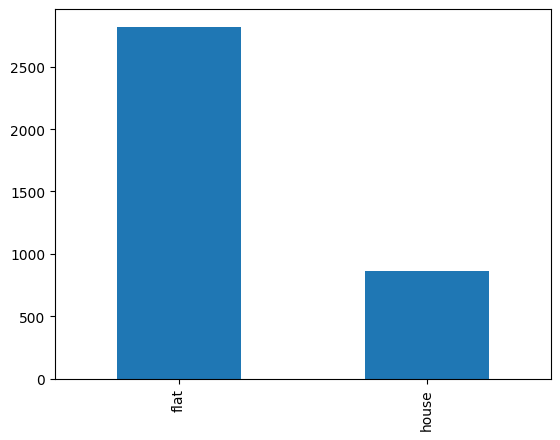

In [12]:
df['property_type'].value_counts().plot(kind='bar',)

#### Observations

- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

### society

In [13]:
df['society'].value_counts().shape

(676,)

In [14]:
df['society'].value_counts()

independent                                          486
tulip violet                                          75
ss the leaf                                           73
dlf new town heights                                  42
shapoorji pallonji joyville gurugram                  42
                                                    ... 
landmark house                                         1
dlf gardencity enclave                                 1
naman residency                                        1
nirvana country                                        1
arjun marg/ sector- 26 phase- 1/ golf course road      1
Name: society, Length: 676, dtype: int64

In [15]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023489
ss the leaf                             0.046351
dlf new town heights                    0.059505
shapoorji pallonji joyville gurugram    0.072659
signature global park                   0.083620
                                          ...   
umang winter hills                      0.490135
umang monsoon breeze                    0.494206
ats kocoon                              0.498277
ansal heights 86                        0.502349
unitech uniworld resorts                0.506107
Name: society, Length: 75, dtype: float64

In [16]:
society_counts = df['society'].value_counts()
# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: >

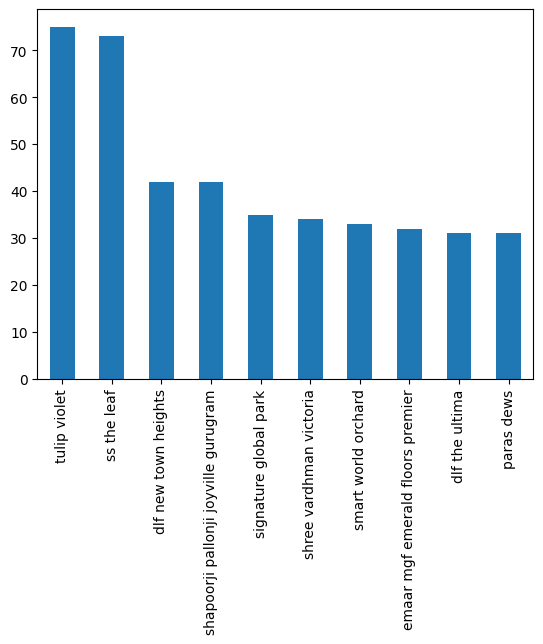

In [17]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [18]:
df['society'].isnull().sum()

1

In [19]:
df[df['society'].isnull()]

property_type society     sector  price  price_per_sqft    area  \
212          flat     NaN  sector 78    0.6          3692.0  1625.0   

                           areaWithType  bedRoom  bathroom balcony  ...  \
212  Built Up area: 1625 (150.97 sq.m.)        2         2       0  ...   

     built_up_area carpet_area study room  servant room  store room  \
212         1625.0         NaN          0             0           0   

     pooja room  others  furnishing_type  pred  luxury_score  
212           0       0                0     0           0.0  

[1 rows x 24 columns]

#### Observations

- Around 13% properties comes under independent tag.
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [20]:
# unique sectors
df['sector'].value_counts().shape

(115,)

<Axes: >

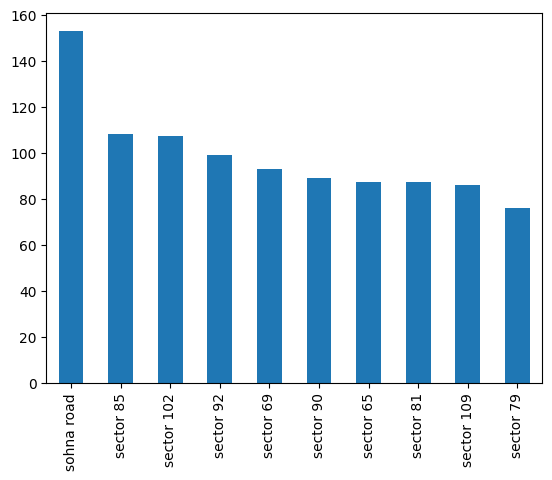

In [21]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [22]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 62,
 'Low (2-9)': 24,
 'Very Low (1)': 1}

#### Observations

- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 16 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Price

In [23]:
df['price'].isnull().sum()

17

In [24]:
df['price'].describe()

count    3663.000000
mean        2.532643
std         2.979239
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

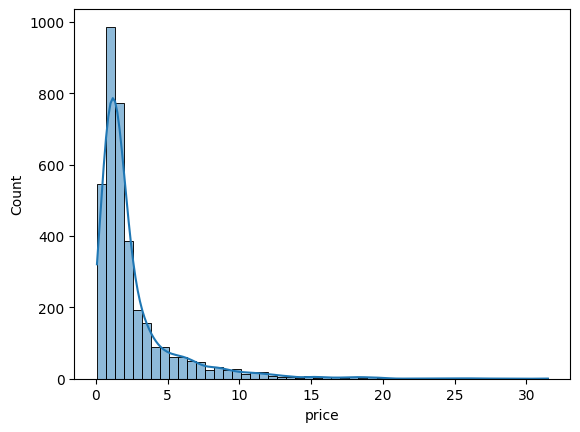

In [25]:
sns.histplot(df['price'], kde=True, bins=50)

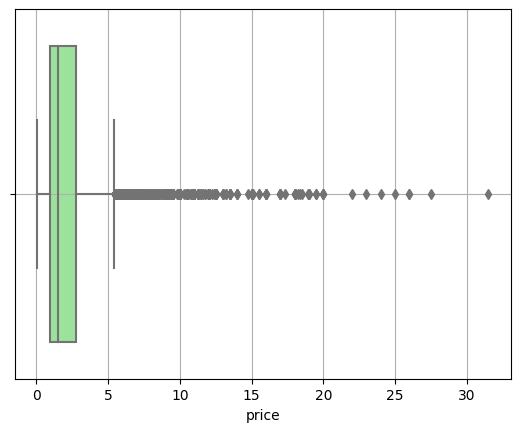

In [26]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.


- Missing Values: There are 17 missing values in the price column.

In [27]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2819532275629997 14.956414554904166


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [28]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.252
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [29]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1
IQR

1.8

In [30]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [31]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 24)

In [32]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: >

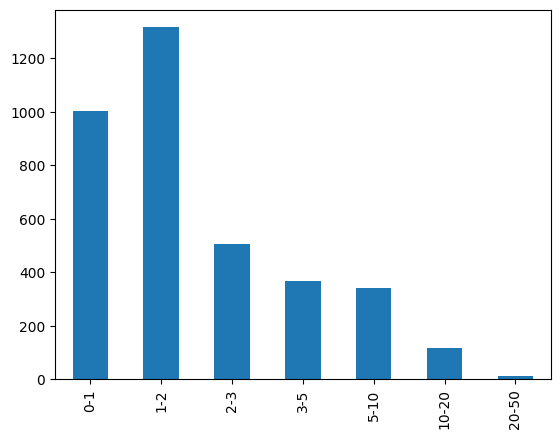

In [33]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

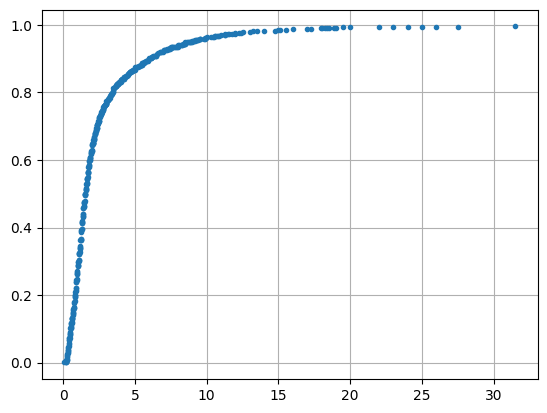

In [34]:
# Near about 99% values are below 18 cr
# ecdf plot (Emperical cummulative Distribution Function)
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

In [35]:
x=df['price'].value_counts().sort_index().cumsum() / len(df['price'])
x[x < 0.99]

0.07     0.000272
0.16     0.000543
0.17     0.000815
0.19     0.001087
0.20     0.003261
           ...   
16.00    0.987228
17.00    0.988315
17.30    0.988587
18.00    0.989674
18.02    0.989946
Name: price, Length: 459, dtype: float64

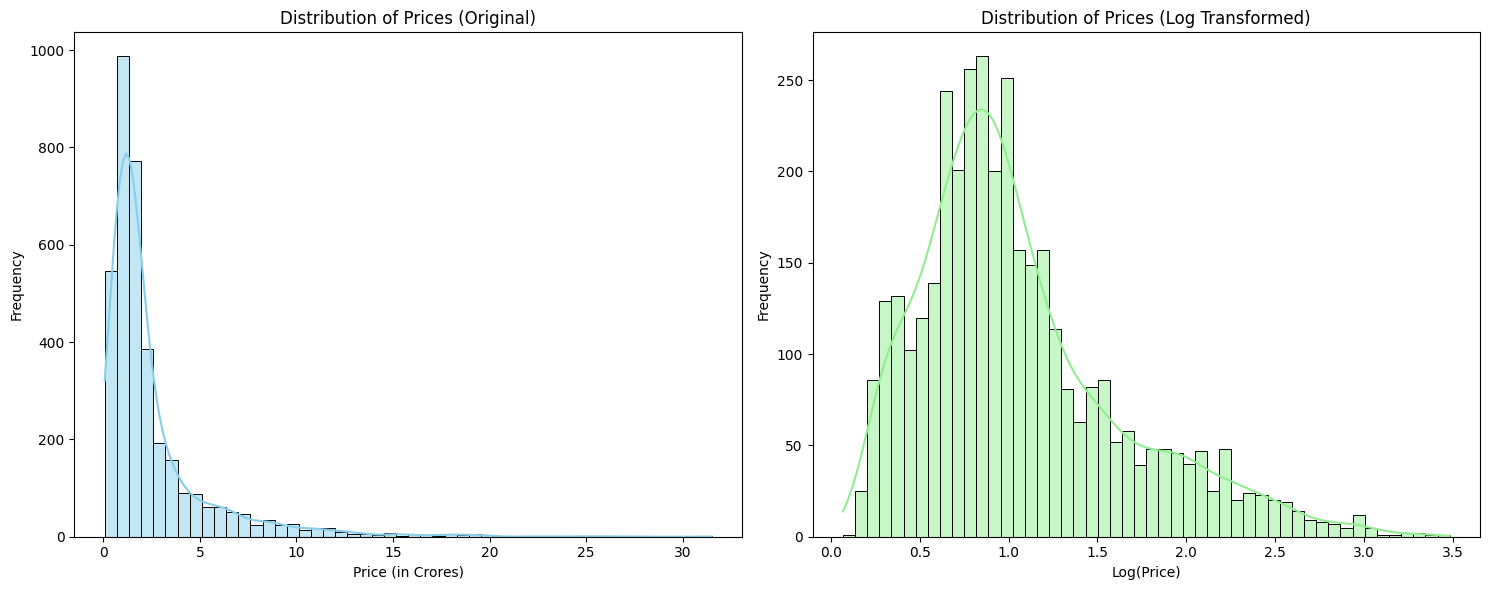

In [36]:
plt.figure(figsize = (15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x.
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [37]:
# Significant reduction in skewness and kurtosis
skewness = (df['price']).skew()
kurtosis = (df['price']).kurt()
print(skewness,kurtosis)
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()
print(skewness,kurtosis)

3.2819532275629997 14.956414554904166
1.0750620457659728 0.970470620980068


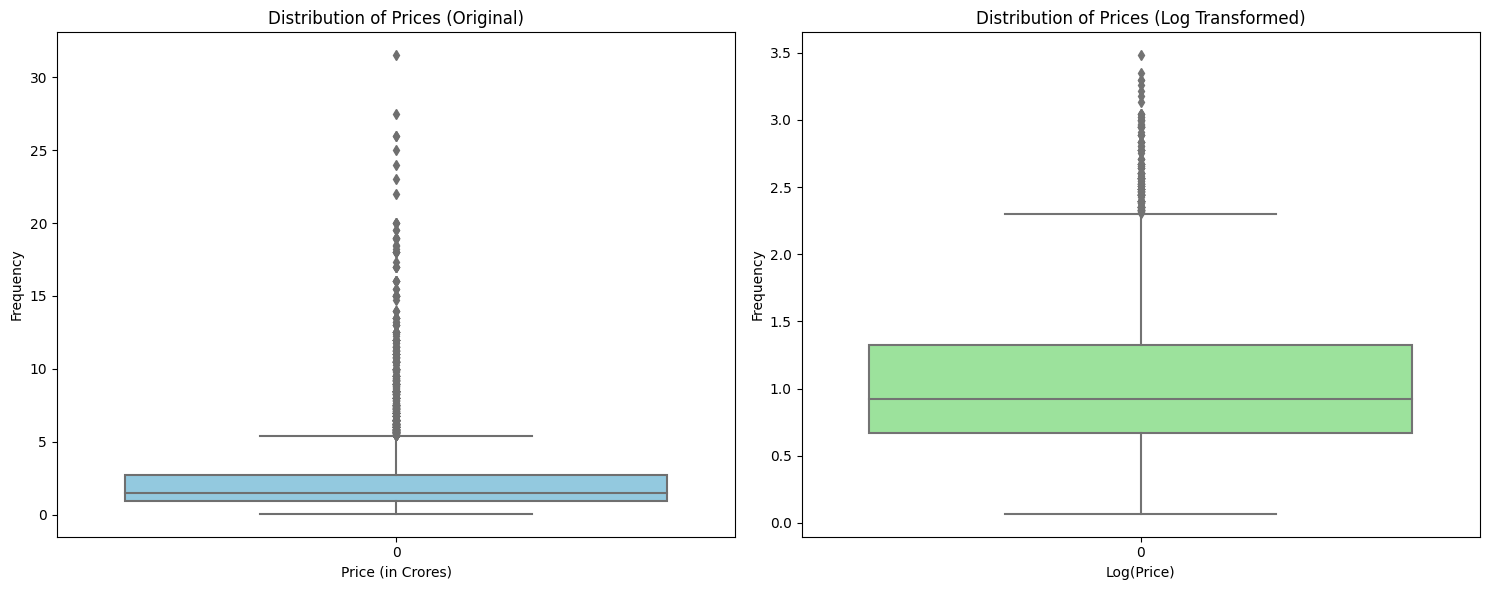

In [38]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
# Better Range distribution and less outliers
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [39]:
df['price_per_sqft'].isnull().sum()

17

In [40]:
df['price_per_sqft'].describe()

count      3663.000000
mean      13895.628720
std       23200.915563
min           4.000000
25%        6818.000000
50%        9022.000000
75%       13888.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

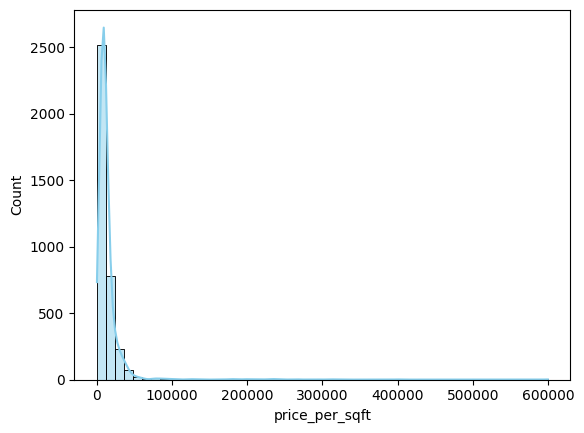

In [41]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

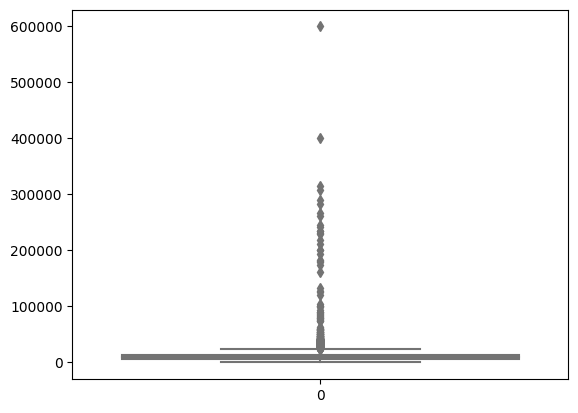

In [42]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### bedRoom
-Majority of values are between 2-5
- 3 being max with about 43% followed by 2 with 27% and 4 with 20%

In [43]:
df['bedRoom'].isnull().sum()

0

<Axes: >

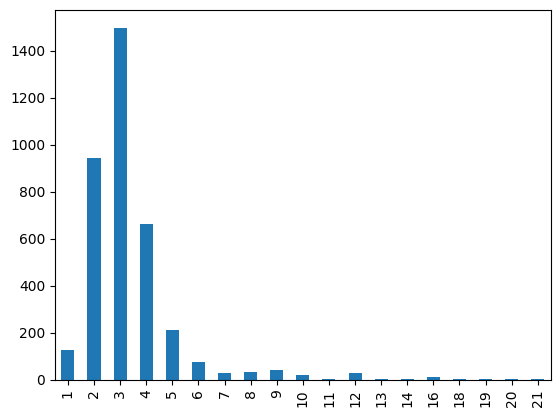

In [44]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

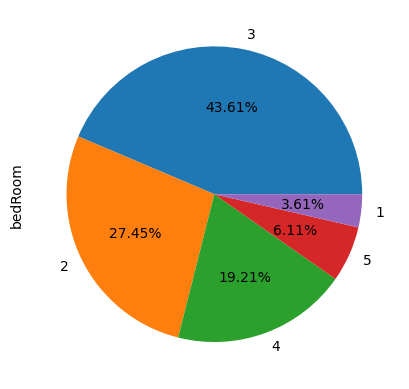

In [45]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom
- Majority values count within 2-5
- where 2 and 3 being about 31% followed by 4 with 25%

In [46]:
df['bathroom'].isnull().sum()

0

<Axes: >

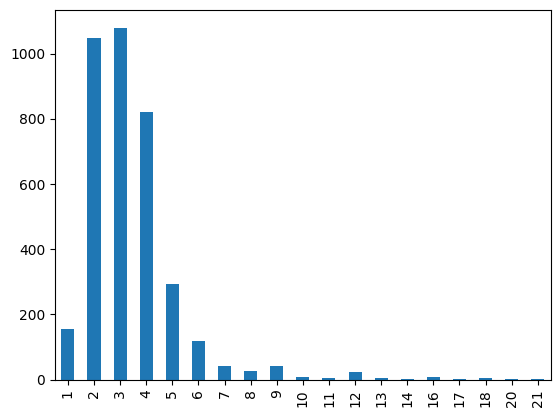

In [47]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

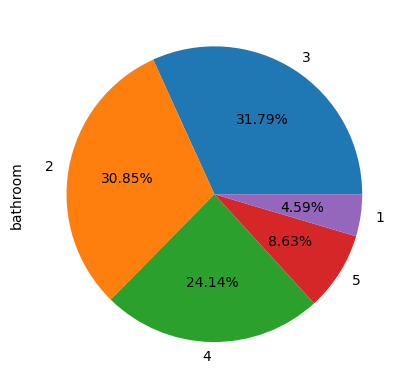

In [48]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [49]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

### balcony
- 2,3 and 3+ are the most common balcony values

In [50]:
df['balcony'].isnull().sum()

0

<Axes: >

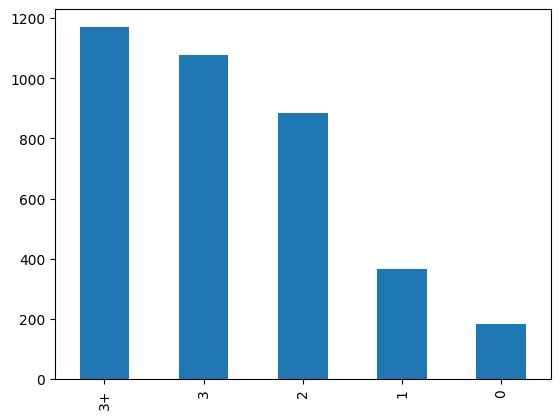

In [51]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

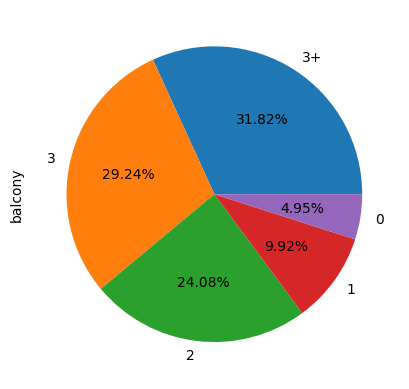

In [52]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [53]:
### floorNum

In [54]:
df.iloc[:,10:].head()

floorNum      facing   agePossession  super_built_up_area  built_up_area  \
0       3.0  North-East    New Property               1572.0            NaN   
1       2.0         NaN       Undefined                  NaN          484.0   
2      12.0  North-East  Relatively New               1805.0         1350.0   
3       7.0        East  Relatively New               1283.0            NaN   
4       1.0         NaN    Old Property                  NaN          900.0   

   carpet_area  study room  servant room  store room  pooja room  others  \
0          NaN           1             0           0           0       0   
1          NaN           0             0           0           0       0   
2       1100.0           0             0           0           0       0   
3          NaN           0             1           0           0       1   
4          NaN           0             0           0           0       0   

   furnishing_type  pred  luxury_score  
0                0     0          49.0  
1                0     0           0.0  
2                2     0          96.0  
3                0     0          72.0  
4                0     0           0.0

In [55]:
df['floorNum'].isnull().sum()

19

In [56]:
df['floorNum'].describe()

count    3661.000000
mean        6.799235
std         6.017584
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

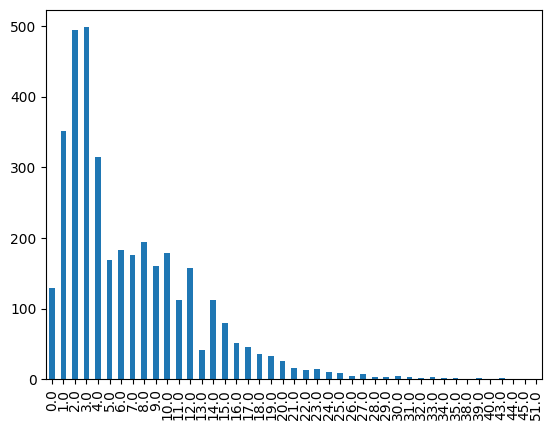

In [57]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

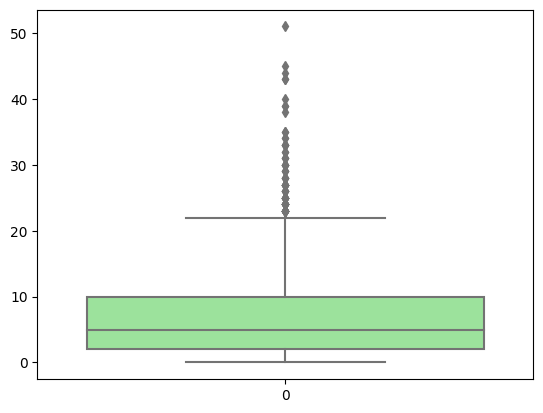

In [58]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [59]:
df['facing'].isnull().sum()

1048

In [60]:
df['facing'].fillna('NA',inplace=True)

In [61]:
df['facing'].value_counts()

NA            1048
East           624
North-East     623
North          387
West           248
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

### agePossession
- Max properties are Relatively New followed by New property then moderately old

In [62]:
df['agePossession'].isnull().sum()

0

In [63]:
df['agePossession'].value_counts()

Relatively New        1645
New Property           594
Moderately Old         563
Undefined              440
Old Property           303
Under Construction     135
Name: agePossession, dtype: int64

### areas

In [64]:
# super built up area
df['super_built_up_area'].isnull().sum()

1805

In [65]:
df['super_built_up_area'].describe()

count     1875.00000
mean      1923.57736
std        763.55872
min         89.00000
25%       1478.50000
50%       1828.00000
75%       2215.00000
max      10000.00000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

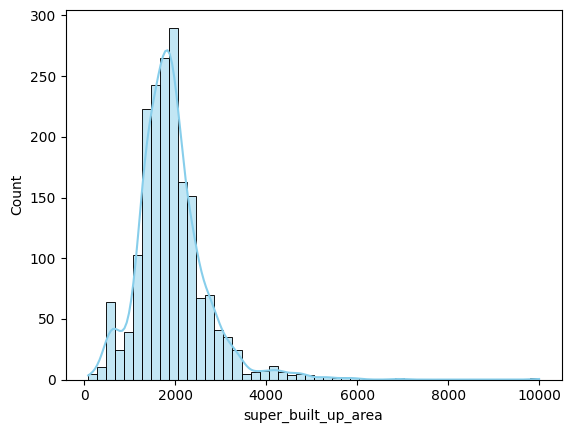

In [66]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: >

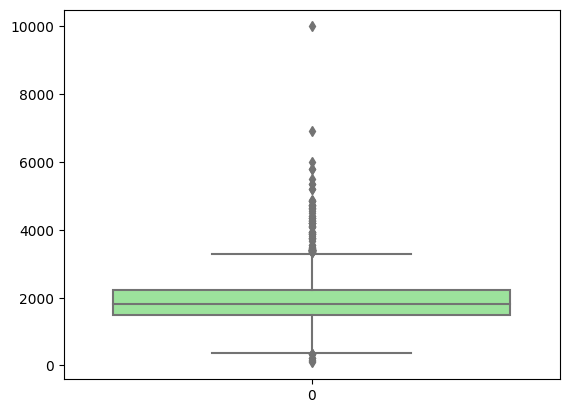

In [67]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [68]:
# built up area
df['built_up_area'].isnull().sum()

1988

In [69]:
df['built_up_area'].describe()

count      1692.000000
mean       2378.685715
std       17932.302077
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

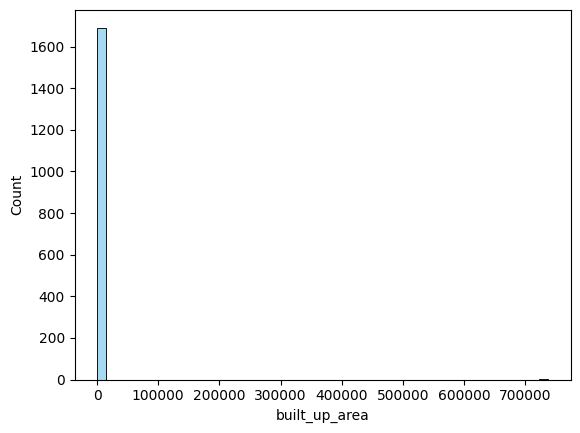

In [70]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area'>

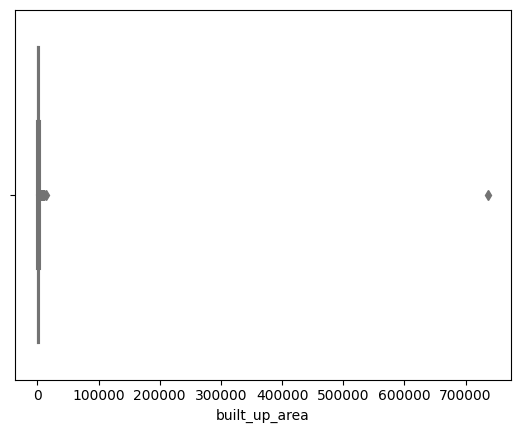

In [71]:
sns.boxplot(data=df,x=df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.


The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [72]:
# carpet area
df['carpet_area'].isnull().sum()

1806

In [73]:
df['carpet_area'].describe()

count      1874.000000
mean       2528.352742
std       22787.674739
min          15.000000
25%         845.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

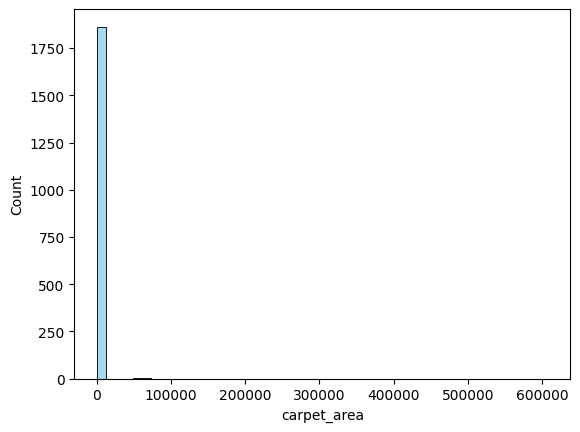

In [74]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='carpet_area'>

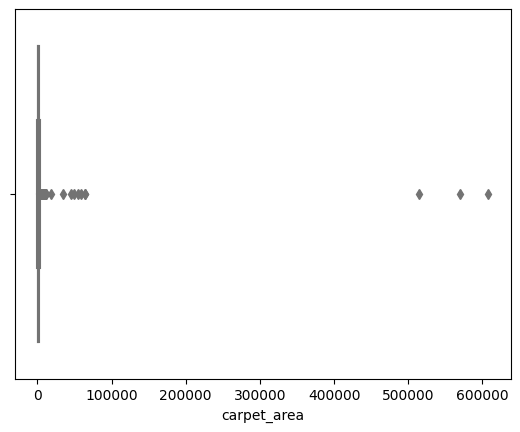

In [75]:
sns.boxplot(data=df,x=df['carpet_area'].dropna(), color='lightgreen')

In [76]:
df.iloc[:,16:]

study room  servant room  store room  pooja room  others  \
0              1             0           0           0       0   
1              0             0           0           0       0   
2              0             0           0           0       0   
3              0             1           0           0       1   
4              0             0           0           0       0   
...          ...           ...         ...         ...     ...   
3675           0             1           0           0       1   
3676           0             1           0           0       0   
3677           0             1           0           0       0   
3678           0             0           0           1       1   
3679           0             1           0           0       0   

      furnishing_type  pred  luxury_score  
0                   0     0          49.0  
1                   0     0           0.0  
2                   2     0          96.0  
3                   0     0          72.0  
4                   0     0           0.0  
...               ...   ...           ...  
3675                0     0           NaN  
3676                0     1           NaN  
3677                2     0           NaN  
3678                0     0           NaN  
3679                2     1           NaN  

[3680 rows x 8 columns]

### additional rooms

In [77]:
# Study Room in 19.2% properties
# Servant Room in 36.1% properties
# Store Room in 9.2% of properties
# Pooj Room in 17.8% of properties
# Others in 11.0% properties

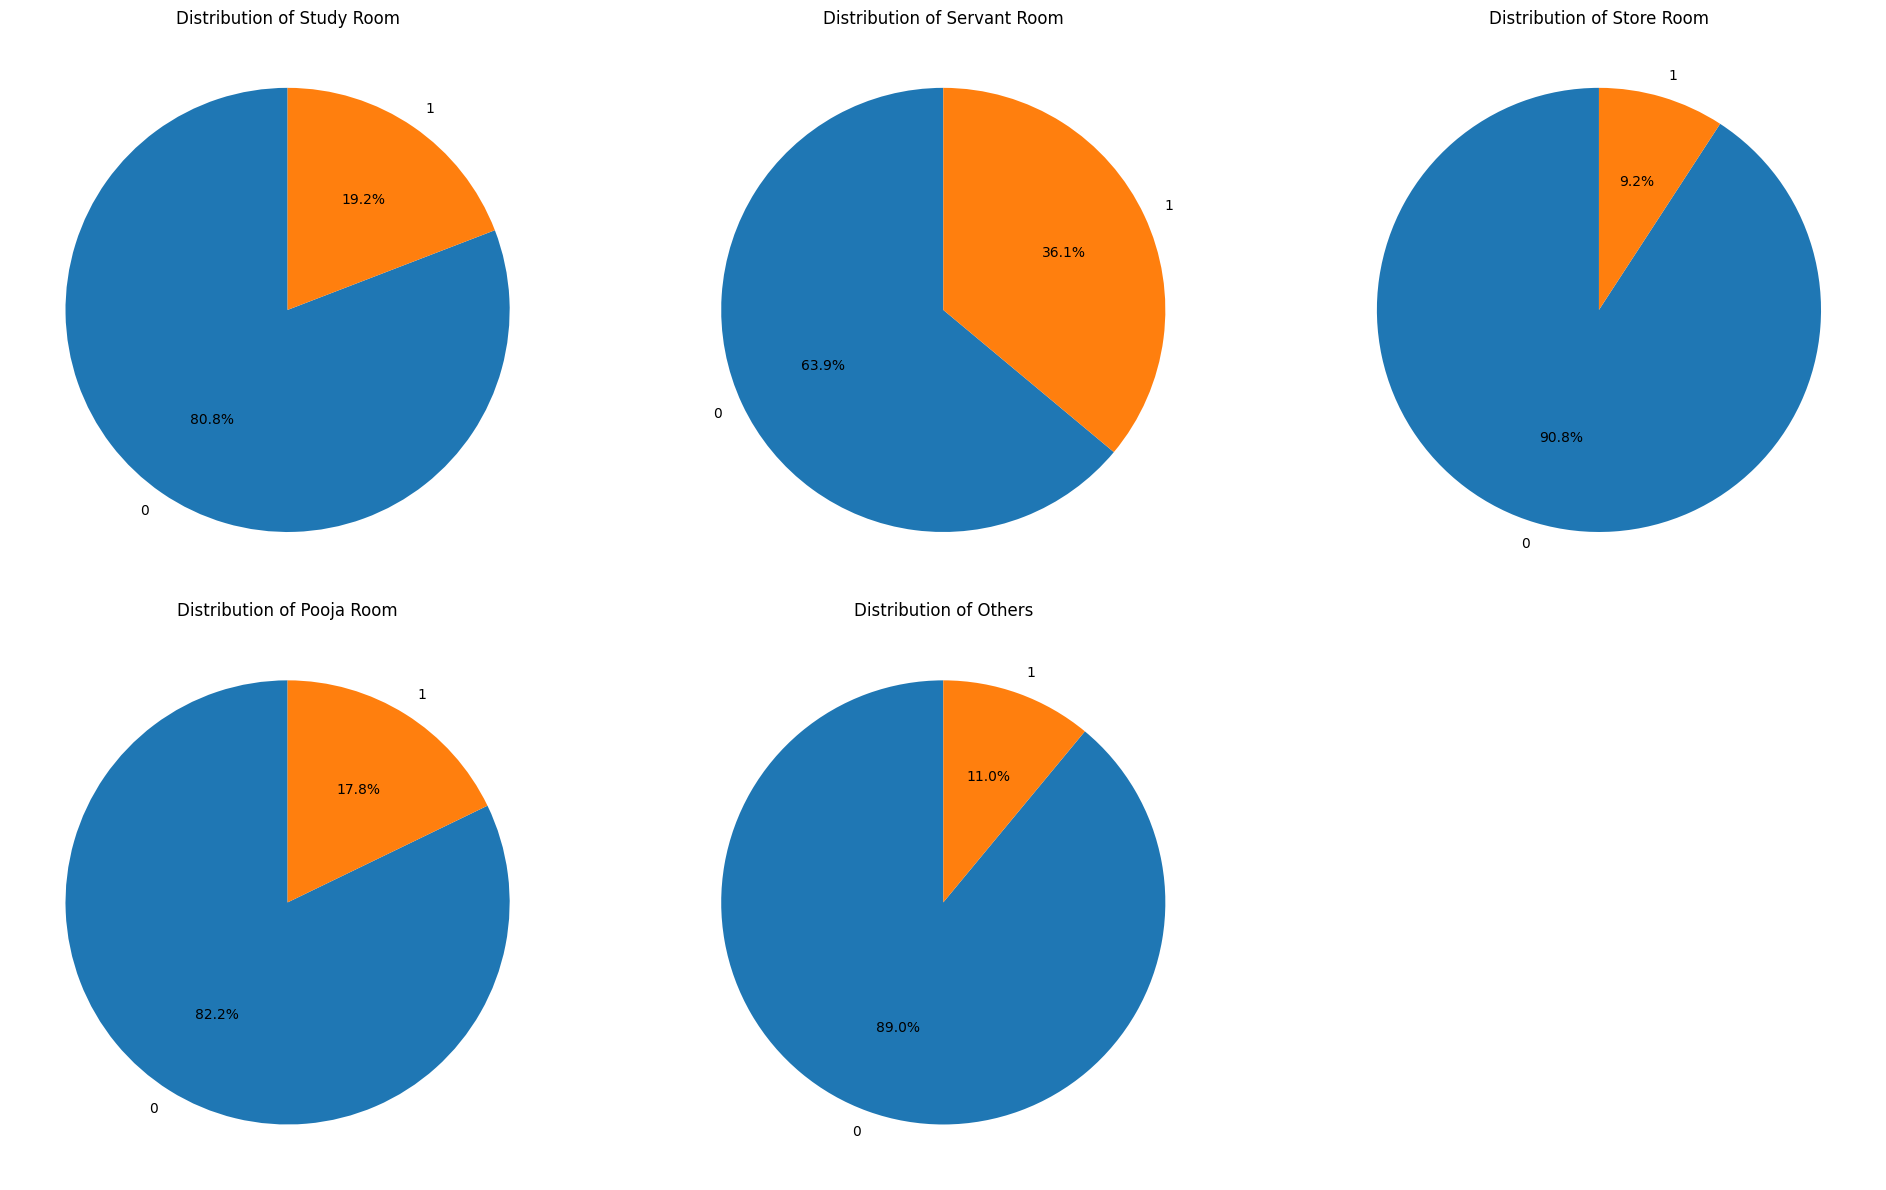

In [78]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [79]:
# 6.22% Furnished Flats
# 34.28% Semi Furnished Flats
# 59.90% Non-Furnished Flats

In [80]:
df['furnishing_type'].value_counts()

0    2418
2    1053
1     209
Name: furnishing_type, dtype: int64

<Axes: ylabel='furnishing_type'>

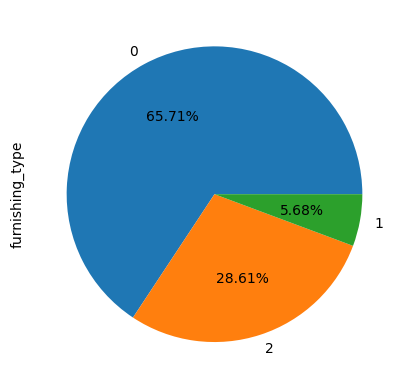

In [81]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [82]:
df['luxury_score'].isnull().sum()

116

In [83]:
df['luxury_score'].describe()

count    3564.000000
mean       71.373737
std        53.061512
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

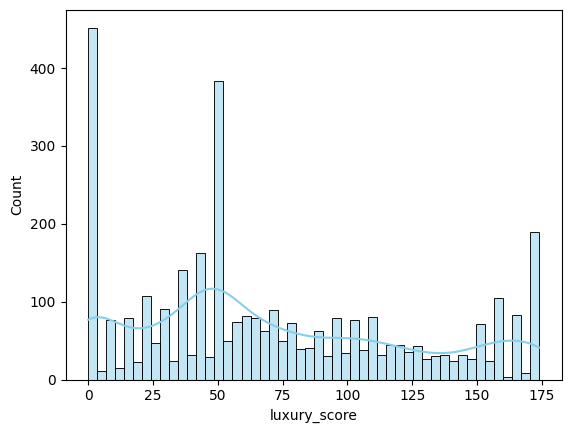

In [84]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: xlabel='luxury_score'>

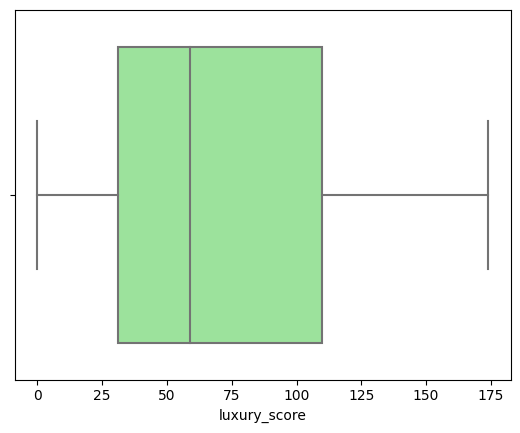

In [85]:
sns.boxplot(data=df,x=df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [86]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

In [87]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

### property_type vs price
-- Median price for flats is about 1.5 cr where as it about 4.2 cr for houses

In [88]:
df.shape

(3680, 24)

In [89]:
df['property_type'].value_counts()

flat     2821
house     859
Name: property_type, dtype: int64

<Axes: xlabel='property_type', ylabel='price'>

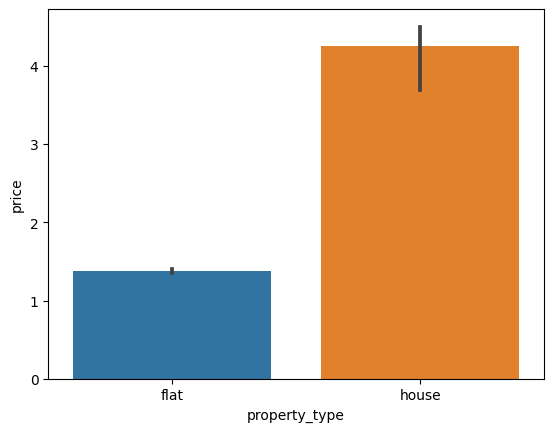

In [90]:
sns.barplot(data=df,x=df['property_type'], y=df['price'].dropna(), estimator=np.median)

<Axes: xlabel='property_type', ylabel='price'>

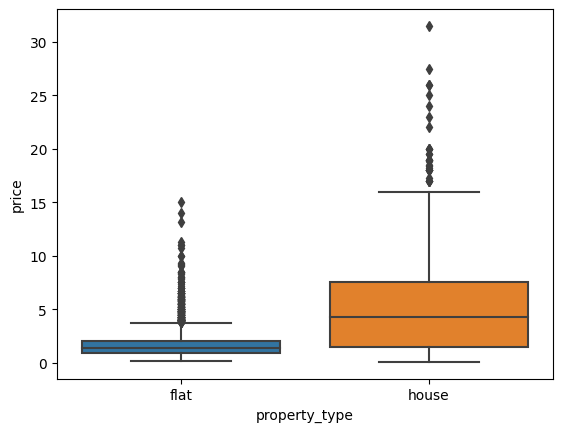

In [91]:
sns.boxplot(x=df['property_type'], y=df['price'])

### property_type vs area
-- Houses have sligtly higher built up area compared to flats

<Axes: xlabel='property_type', ylabel='built_up_area'>

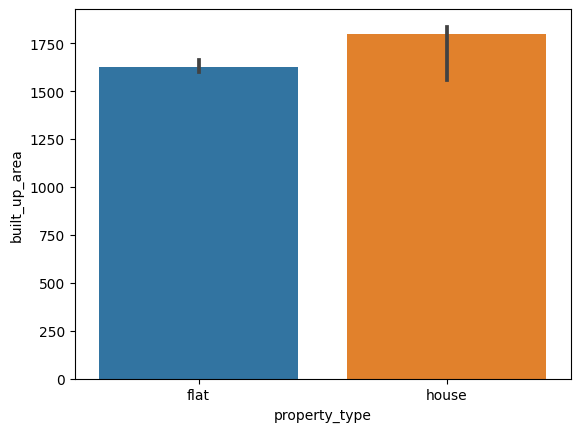

In [92]:
sns.barplot(data=df,x=df['property_type'], y=df['built_up_area'].dropna(), estimator=np.median)

<Axes: xlabel='property_type', ylabel='built_up_area'>

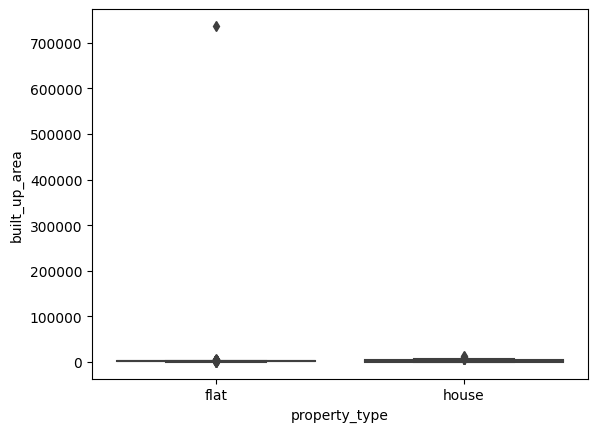

In [93]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'].dropna())

In [94]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

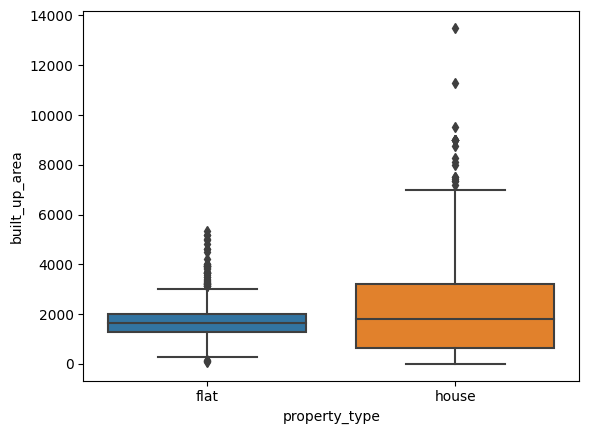

In [95]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

### property_type vs price_per_sqft
- Flats are about 8k per sq_feet where as houses are 20k

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

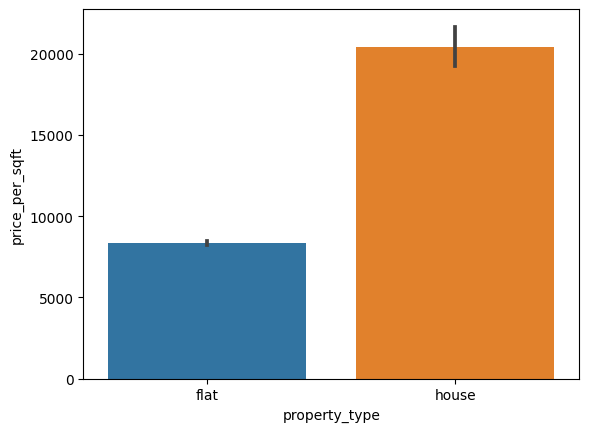

In [96]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'].dropna(), estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

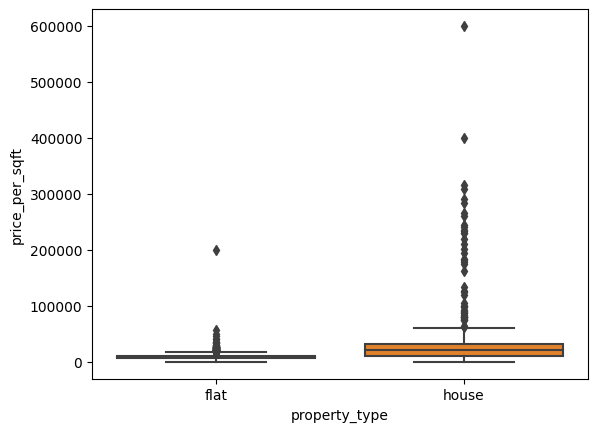

In [97]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [98]:
# check outliers based on the price_per_sqft, Will be  handled in outlier treatment
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

property_type                      society     sector  price  \
214          house     unitech uniworld resorts  sector 33  10.00   
263          house         eros rosewood villas  sector 49   2.75   
672          house       emaar the palm springs  sector 54  24.00   
910          house           vipul tatvam villa  sector 48   7.25   
1045         house            vatika india next  sector 82   7.00   
1088         house                  independent  sector 17   3.50   
1144         house                   ardee city  sector 52   5.50   
1150         house     unitech uniworld resorts  sector 33   9.50   
1272         house          huda plot sector 38  sector 38   4.30   
1289         house                  independent  sector 38   8.00   
1346         house  unitech nirvana birch court  sector 50   7.10   
1640          flat           ambience caitriona  sector 24  14.00   
1788         house                    rk excelo  sector 12   0.60   
1809         house       dlf city plots phase 2  sector 25  10.00   
1859         house                  independent  sector 24  10.00   
1878         house                  independent   sector 4   0.60   
1980         house       dlf city plots phase 2  sector 25  10.50   
2064         house         bhim nagar, sector 6   sector 6   0.85   
2228         house                  independent  sector 54   3.75   
2463         house                dlf the grove  sector 54   5.70   
2626         house                  independent  sector 12   6.00   
2631         house       unitech deerwood chase  sector 50   8.45   
2760         house               uppal southend  sector 49   6.75   
3041         house                  independent  sector 55   1.45   
3180         house                  independent  sector 28   4.50   
3371         house                  independent  sector 23   2.80   
3411         house                  independent  sector 57   8.00   
3459         house                  independent  sector 12   3.50   
3574         house                        ansal  sector 43   1.85   

      price_per_sqft   area  \
214         181818.0  550.0   
263         178571.0  154.0   
672         600000.0  400.0   
910         201388.0  360.0   
1045        194444.0  360.0   
1088        218750.0  160.0   
1144        183333.0  300.0   
1150        173992.0  546.0   
1272        245398.0  175.0   
1289        230547.0  347.0   
1346        283333.0  251.0   
1640        200000.0  700.0   
1788        120000.0   50.0   
1809        400000.0  250.0   
1859        229885.0  435.0   
1878        105263.0   57.0   
1980        261194.0  402.0   
2064        126865.0   67.0   
2228        234375.0  160.0   
2463        211111.0  270.0   
2626        315789.0  190.0   
2631        235376.0  359.0   
2760        290948.0  232.0   
3041        241666.0   60.0   
3180        125000.0  360.0   
3371        161849.0  173.0   
3411        266666.0  300.0   
3459        133079.0  263.0   
3574        308333.0   60.0   

                                           areaWithType  super_built_up_area  \
214                           Plot area 550(51.1 sq.m.)                  NaN   
263   Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...                  NaN   
672                          Plot area 400(37.16 sq.m.)                  NaN   
910                          Plot area 360(33.45 sq.m.)                  NaN   
1045  Plot area 360(33.45 sq.m.)Built Up area: 3900 ...                  NaN   
1088                   Built Up area: 160 (14.86 sq.m.)                  NaN   
1144                         Plot area 300(27.87 sq.m.)                  NaN   
1150                         Plot area 546(50.73 sq.m.)                  NaN   
1272  Plot area 163(15.14 sq.m.)Built Up area: 145 s...                  NaN   
1289  Built Up area: 347 (32.24 sq.m.)Carpet area: 2...                  NaN   
1346                          Plot area 240(22.3 sq.m.)                  NaN   
1640                   Built Up area: 700 (

In [99]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

#Property_type vs bedroom

<Axes: xlabel='bedRoom', ylabel='property_type'>

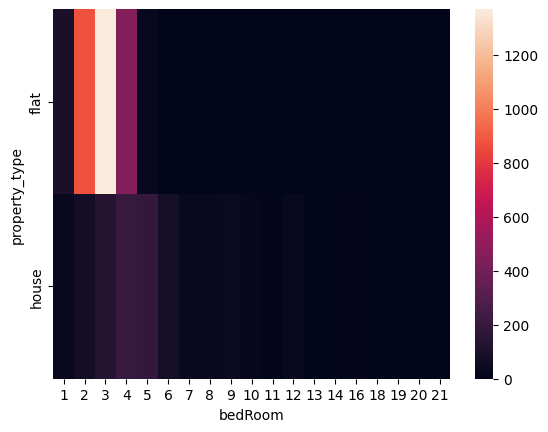

In [100]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

In [101]:
# checking outliers
df[df['bedRoom'] >= 10]

property_type                 society      sector  price  price_per_sqft  \
82           house        dlf city phase 1   sector 26   9.25         47803.0   
153          house             independent   sector 43   3.00         53763.0   
209          house  luxury dlf city floors   sector 26   8.25         45833.0   
228          house             independent   sector 43  13.50         50000.0   
336          house             independent   sector 56  11.50         42032.0   
...            ...                     ...         ...    ...             ...   
3379         house                shivpuri    sector 7   2.80         12444.0   
3445         house             independent  sector 17a   3.93         24214.0   
3494         house             independent   sector 57   6.95         38611.0   
3543         house             independent   sector 40  12.00         38986.0   
3556         house             independent   sector 31   9.25         39530.0   

        area                                       areaWithType  bedRoom  \
82    1935.0  Plot area 1935(179.77 sq.m.)Built Up area: 700...       12   
153    558.0                          Plot area 62(51.84 sq.m.)       12   
209   1800.0                        Plot area 200(167.23 sq.m.)       12   
228   2700.0                        Plot area 300(250.84 sq.m.)       16   
336   2736.0                        Plot area 304(254.18 sq.m.)       12   
...      ...                                                ...      ...   
3379  2250.0                       Plot area 2250(209.03 sq.m.)       10   
3445  1623.0  Plot area 1623(150.78 sq.m.)Built Up area: 162...       19   
3494  1800.0                        Plot area 192(160.54 sq.m.)       12   
3543  3078.0                        Plot area 342(285.96 sq.m.)       16   
3556  2340.0  Plot area 265(221.57 sq.m.)Built Up area: 262 ...       12   

      bathroom balcony  ...  built_up_area carpet_area study room  \
82          12      3+  ...         7000.0         NaN          0   
153         12      3+  ...          558.0         NaN          0   
209         12      3+  ...         1800.0         NaN          0   
228         16      3+  ...         2700.0         NaN          1   
336         13      3+  ...         2736.0         NaN          1   
...        ...     ...  ...            ...         ...        ...   
3379         7       3  ...         2250.0         NaN          1   
3445        17       3  ...         1622.0         NaN          1   
3494        12      3+  ...         1728.0         NaN          0   
3543        16      3+  ...         3078.0         NaN          1   
3556        12      3+  ...          262.0       260.0          0   

      servant room  store room  pooja room  others  furnishing_type  pred  \
82               1           0           1       0                2     0   
153              0           0           0       1                1     0   
209              1           0           0       0                2     1   
228              1           0           1       1                0     0   
336              1           0           1       0                2     0   
...            ...         ...         ...     ...              ...   ...   
3379             1           0           1       1                2     0   
3445             1           1           1       0                0     0   
3494             1           1           0       0                2     0   
3543             1           1           1       0                2     0   
3556             1           0           1       1                1     0   

      luxury_score  
82            43.0  
153           20.0  
209          105.0  
228           41.0  
336           51.0  
...            ...  
3379          49.0  
3445          89.0  
3494          23.0  
3543          73.0  
3556          49.0  

[72 rows x 24 columns]

# Property type vs floorNum

<Axes: xlabel='property_type', ylabel='floorNum'>

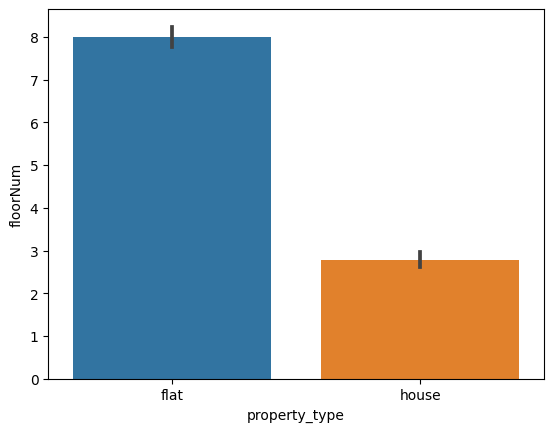

In [102]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

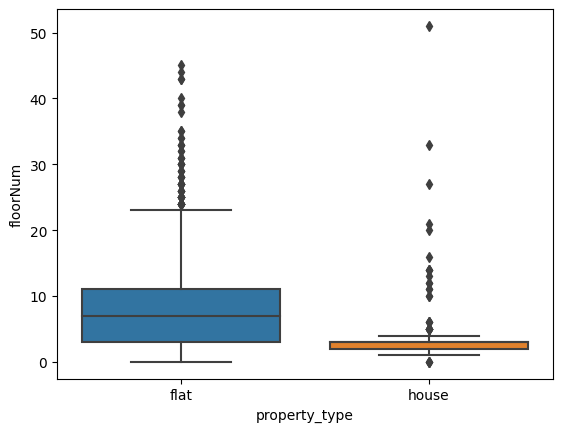

In [103]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])

In [104]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

property_type                  society      sector  price  \
85           house              greenopolis   sector 89   0.70   
457          house              spaze privy   sector 72   3.09   
550          house  indiabulls centrum park  sector 103   3.25   
627          house      satya the hermitage  sector 103   3.15   
930          house        suncity avenue 76   sector 76   0.75   
1073         house           dlf the arbour   sector 63   8.50   
1334         house      ireo victory valley   sector 67   8.00   
1369         house               ninex city   sector 76   1.75   
1417         house   vatika the seven lamps   sector 82   1.60   
1605         house         suncity township   sector 54   2.00   
1927         house              spaze privy   sector 72   3.10   
2071         house           ats tourmaline  sector 109   1.87   
2832         house          godrej meridien  sector 106   5.60   
3624         house              independent   sector 92   1.80   

      price_per_sqft    area  \
85            5397.0  1297.0   
457           6981.0  4426.0   
550           8125.0  4000.0   
627           6702.0  4700.0   
930          10067.0   745.0   
1073         21519.0  3950.0   
1334         22222.0  3600.0   
1369          6250.0  2800.0   
1417          6597.0  2425.0   
1605         30968.0   646.0   
1927          8486.0  3653.0   
2071          8697.0  2150.0   
2832         14000.0  4000.0   
3624          7627.0  2360.0   

                                           areaWithType  bedRoom  bathroom  \
85                    Built Up area: 1297 (120.5 sq.m.)        2         2   
457   Built Up area: 3653 (339.37 sq.m.)Carpet area:...        5         5   
550                        Plot area 4000(371.61 sq.m.)        4         3   
627                  Built Up area: 4700 (436.64 sq.m.)        4         5   
930   Plot area 745(69.21 sq.m.)Built Up area: 745 s...        2         2   
1073                 Built Up area: 3950 (366.97 sq.m.)        4         4   
1334                        Plot area 400(334.45 sq.m.)        6         7   
1369                   Carpet area: 2800 (260.13 sq.m.)        4         4   
1417                       Plot area 2425(225.29 sq.m.)        4         4   
1605  Plot area 60Built Up area: 60 sq.m.Carpet area...        9         9   
1927                       Plot area 3653(339.37 sq.m.)        5         5   
2071                 Built Up area: 2150 (199.74 sq.m.)        3         4   
2832                       Plot area 4000(371.61 sq.m.)        5         4   
3624                 Built Up area: 2360 (219.25 sq.m.)        4         5   

     balcony  ...  built_up_area carpet_area study room  servant room  \
85         2  ...         1297.0         NaN          0             0   
457       3+  ...         3653.0      2922.0          0             1   
550       3+  ...         4000.0         NaN          0             0   
627        0  ...         4700.0         NaN          0             0   
930        2  ...          745.0         NaN          0             0   
1073      3+  ...         3950.0         NaN          0             0   
1334      3+  ...         3600.0         NaN          1             1   
1369       0  ...            NaN      2800.0          0             0   
1417      3+  ...         2425.0         NaN          0             1   
1605       3  ...           60.0        59.0          0             1   
1927      3+  ...         3653.0         NaN          0             0   
2071       0  ...         2150.0         NaN          0             0   
2832      3+  ...         4000.0         NaN          1             1   
3624       0  ...         2360.0         NaN          0             0   

      store room  pooja room  others  furnishing_type  pred  luxury_score  
85             0           0       0                0     0           0.0  
457            0           0       0                2     0          73.0  
550            0           0       0  

In [105]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

# property type vs agepossesion

<Axes: xlabel='agePossession', ylabel='property_type'>

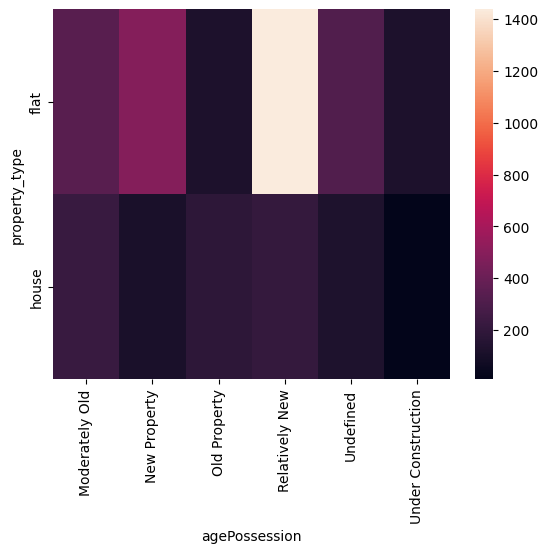

In [106]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

# Property type vs agepossesion
- Houses are significantly costlier than flats across all agepossesion categories
-Old flats are costliers where as new houses are costlier

<Axes: xlabel='agePossession', ylabel='property_type'>

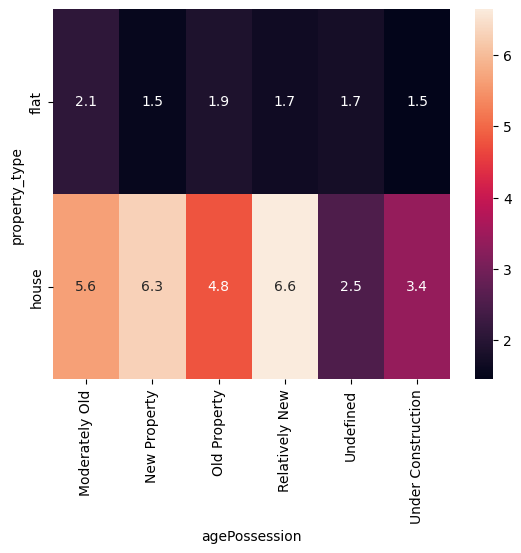

In [107]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)

# property type vs bedroom
- prices increases with number of bedrooms in both houses as well as flats with few exceptions

<Axes: xlabel='bedRoom', ylabel='property_type'>

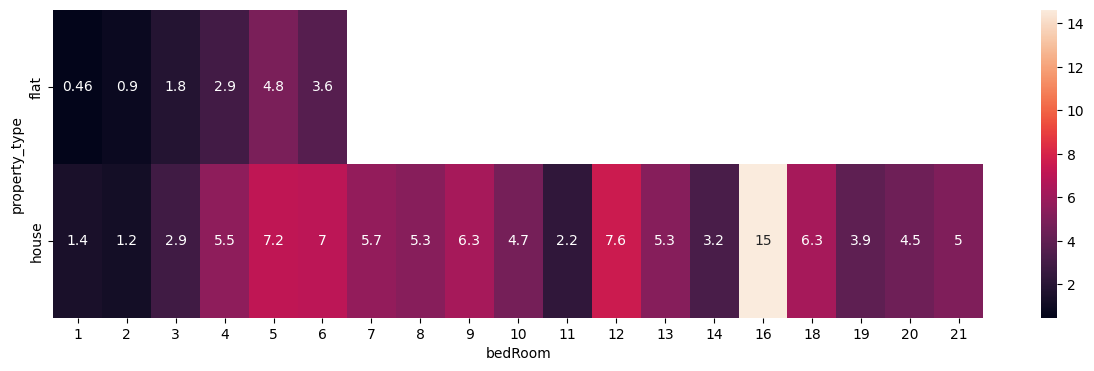

In [108]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

# property type vs furnishing_type
- houses are more furnished compared to flats
- price increases with furnishing in both the cases

<Axes: xlabel='furnishing_type', ylabel='property_type'>

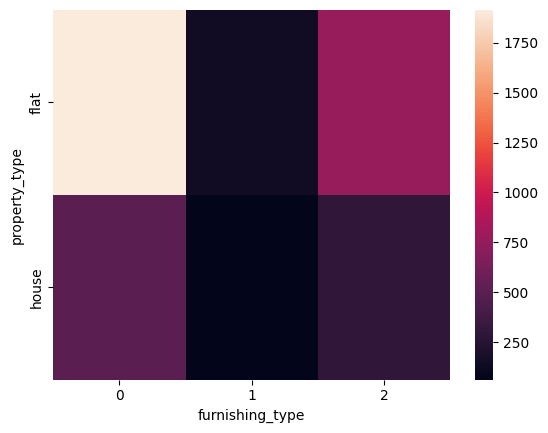

In [109]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

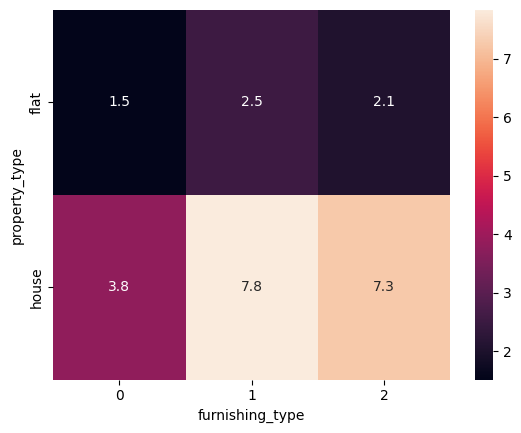

In [110]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

# property type vs luxury score
- flats are more luxurious than houses

<Axes: xlabel='property_type', ylabel='luxury_score'>

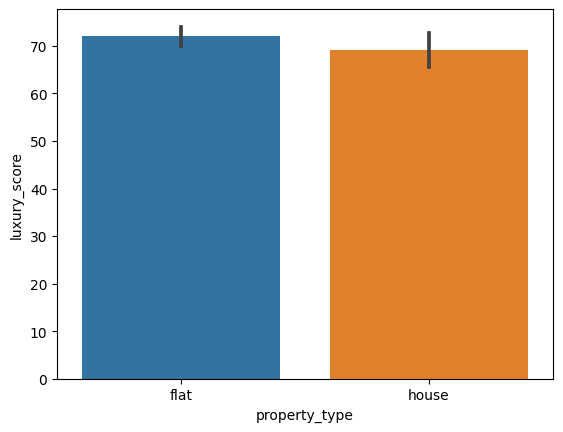

In [111]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

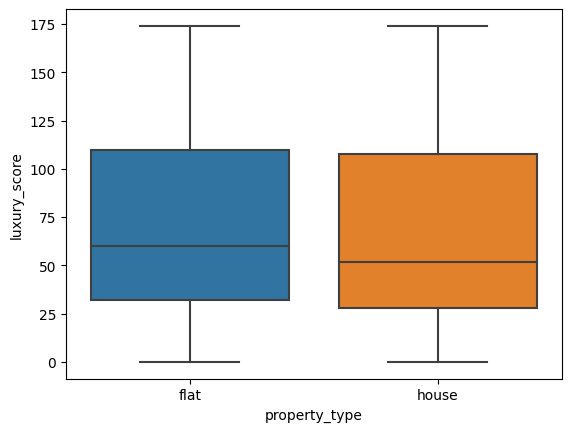

In [112]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])

In [113]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

#Sector Analysis
###Property type vs sectors
-New sectors which are above sector no 70 have more flats where as older sectors(sectors below <70) have more houses
- sectors 25,26,27,45 are really costly
- Where as old gurugoan(0-10) and new gurugoan(70 and above ) are cheap

<Axes: xlabel='sector', ylabel='property_type'>

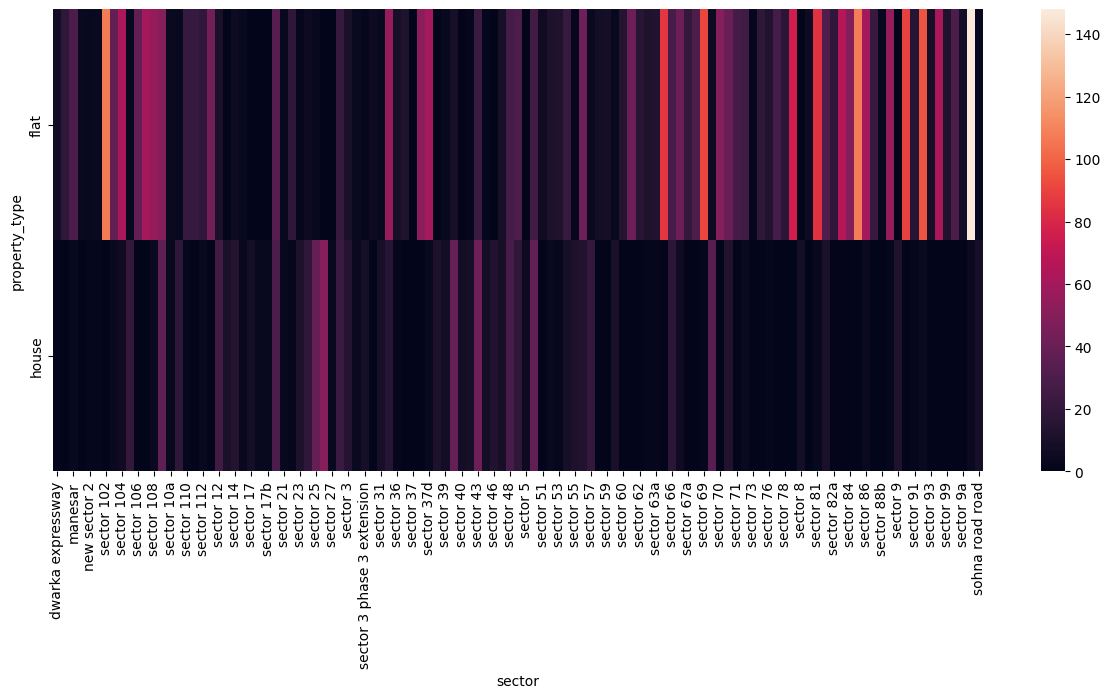

In [114]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

In [115]:
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()
avg_price_per_sector.sort_values(by='price', ascending=False).head(5)

sector      price
33   sector 26  12.680800
32   sector 25   8.989000
53   sector 45   8.498750
26  sector 17b   7.550000
34   sector 27   6.833333

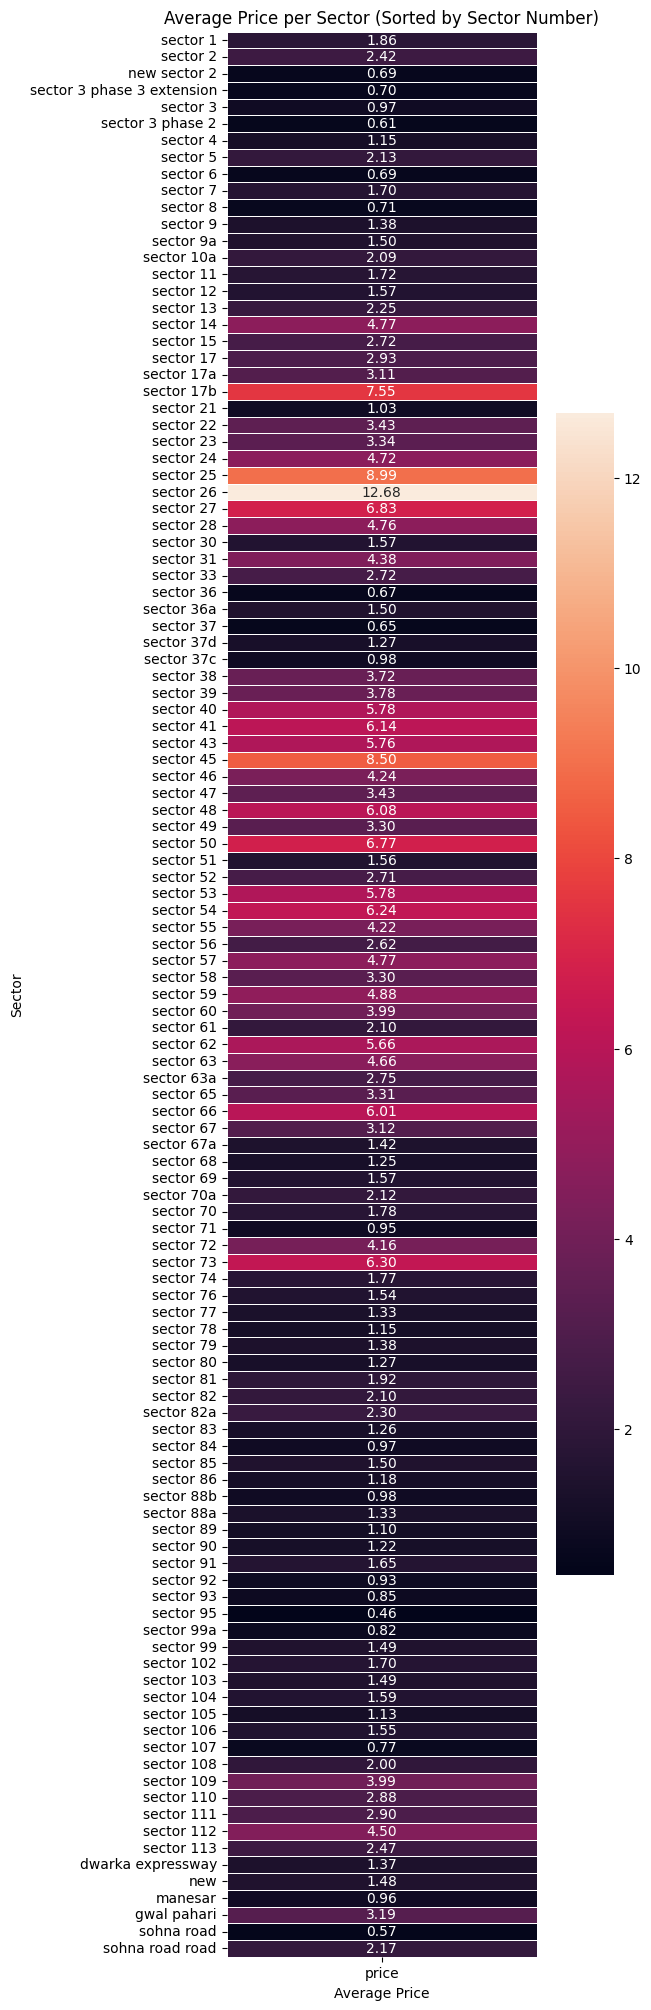

In [116]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers for order
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()


#avg_price_per_sqft vs sector
- sectors 39,55,28,27,56 are top sectors in term of sq_ft.

In [117]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()
avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)
avg_price_per_sqft_sector.sort_values(by='price_per_sqft',ascending=False).head(5)

sector  price_per_sqft  sector_number
47  sector 38    58151.166667           38.0
63  sector 54    55646.800000           54.0
32  sector 25    46565.125000           25.0
31  sector 24    42194.181818           24.0
24  sector 17    41146.875000           17.0

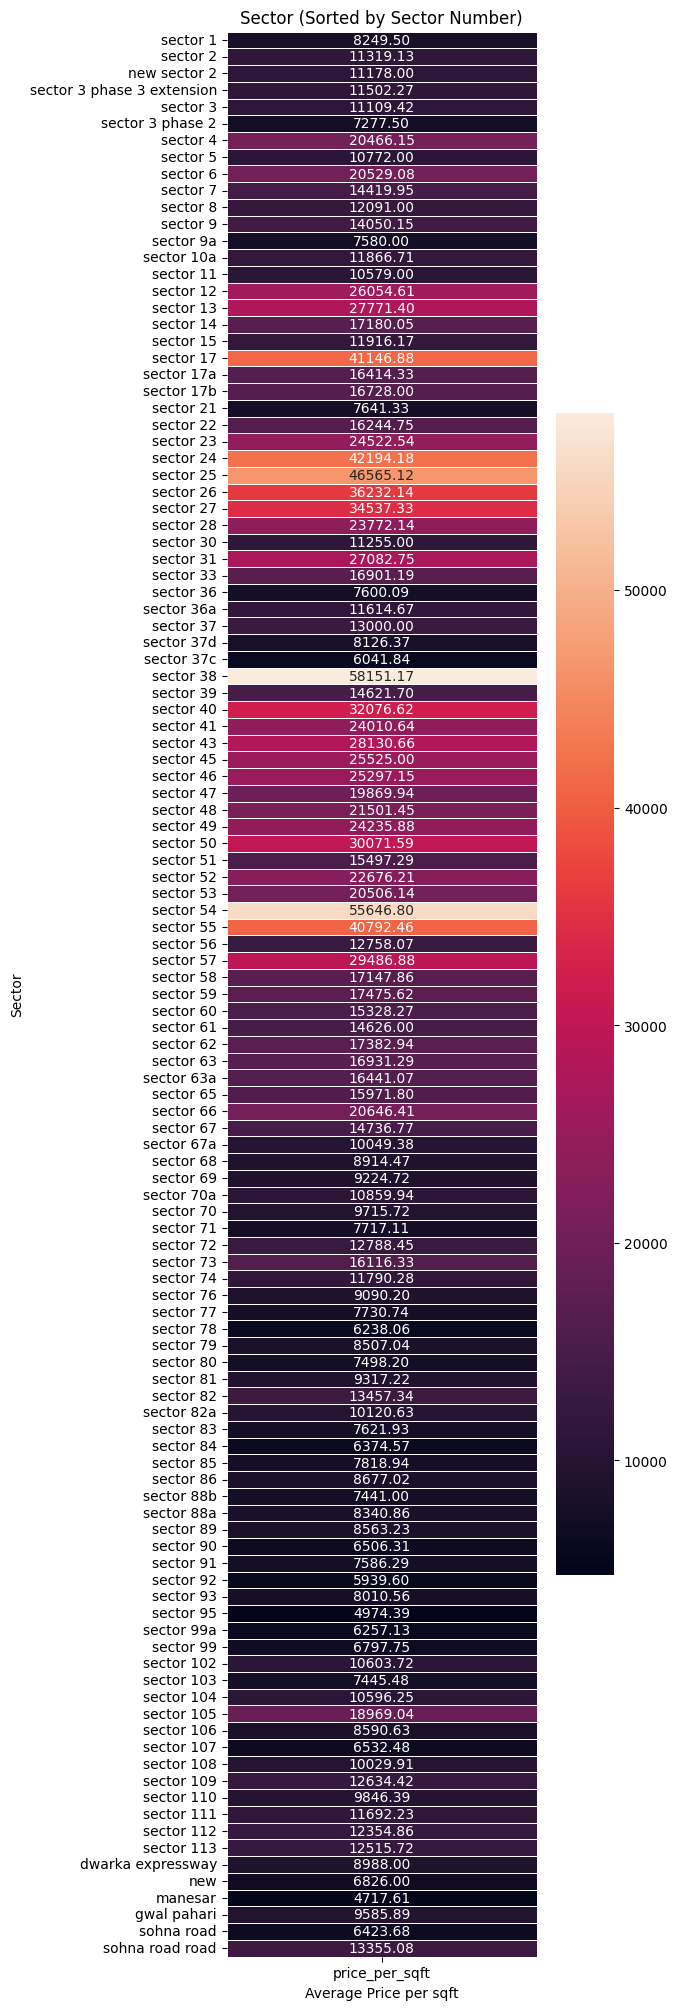

In [118]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

# luxury score vs sectors
- when we move from older sectors towards newer sectors the luxury score imroves significantly

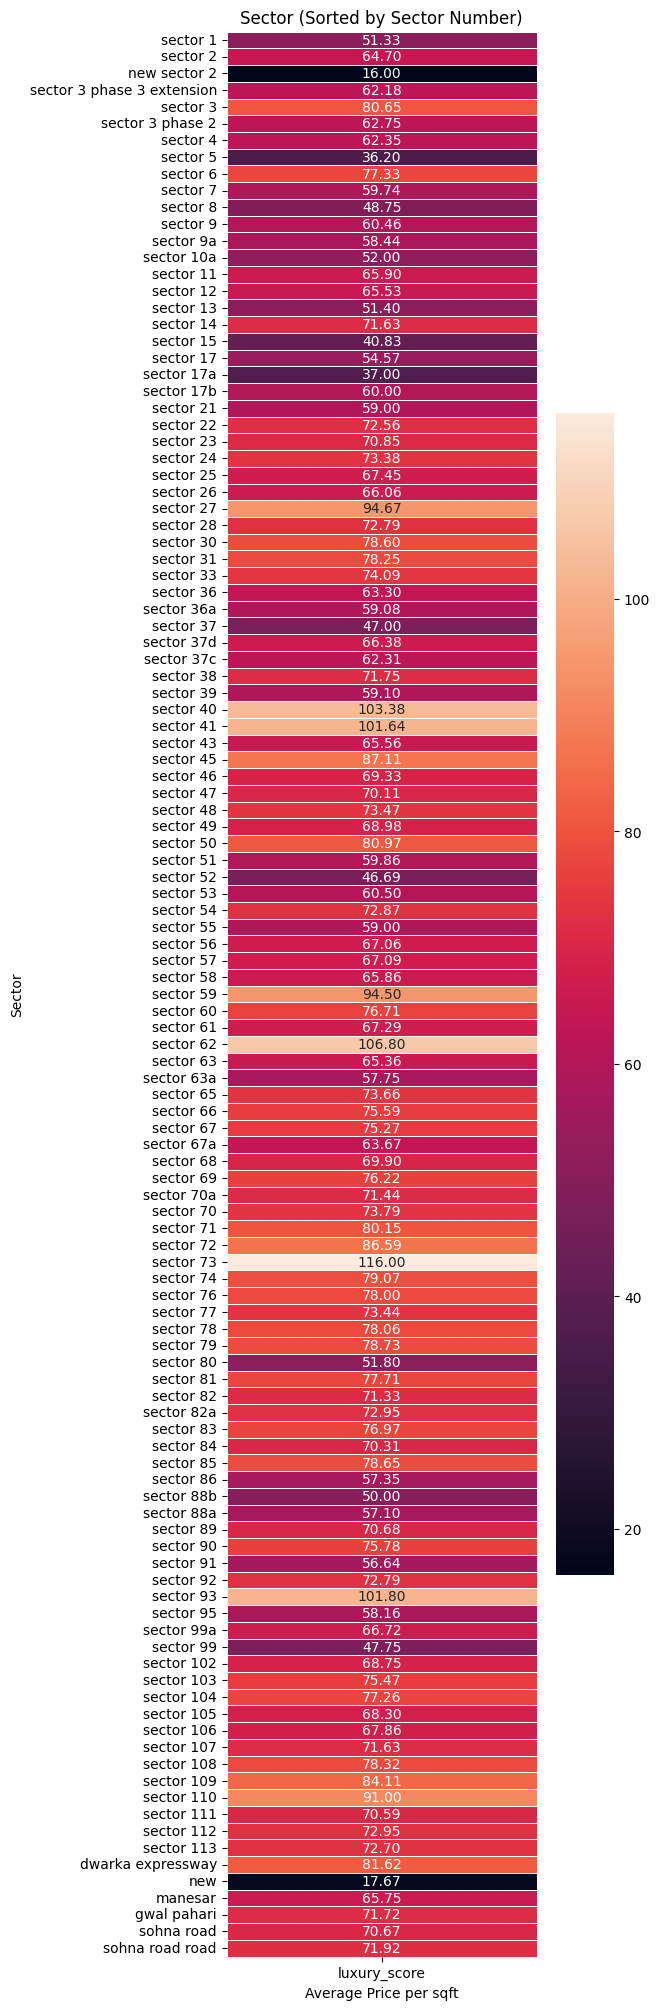

In [119]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

In [120]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

### price vs area
- increase in price with increase in area, and for same area flats with higher number of bedrooms are costlier

<Axes: xlabel='area', ylabel='price'>

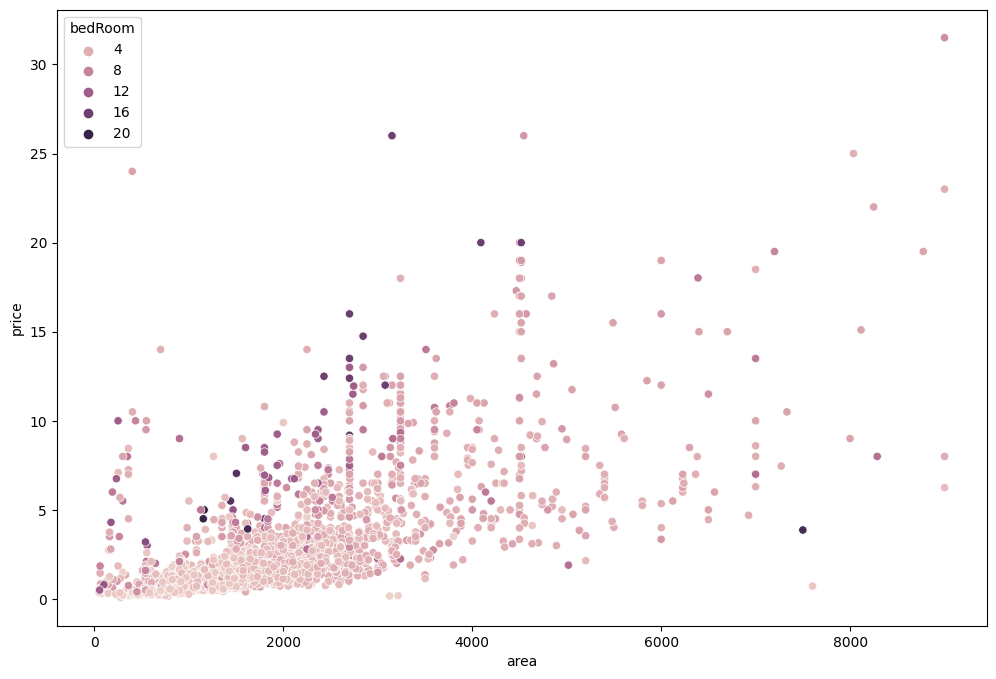

In [121]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x=df[df['area']<10000]['area'],y=df['price'],hue=df['bedRoom'])

<Axes: xlabel='area', ylabel='price'>

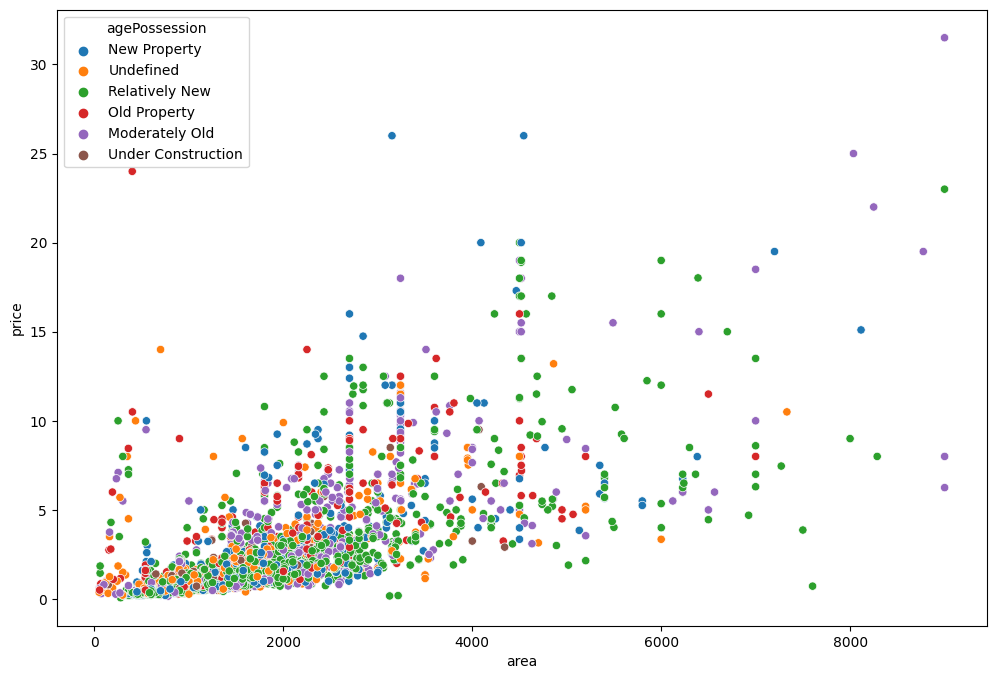

In [122]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x=df[df['area']<10000]['area'],y=df['price'],hue=df['agePossession'])

# price vs furnishig type
- low area low price are usually unfurnished flats

<Axes: xlabel='area', ylabel='price'>

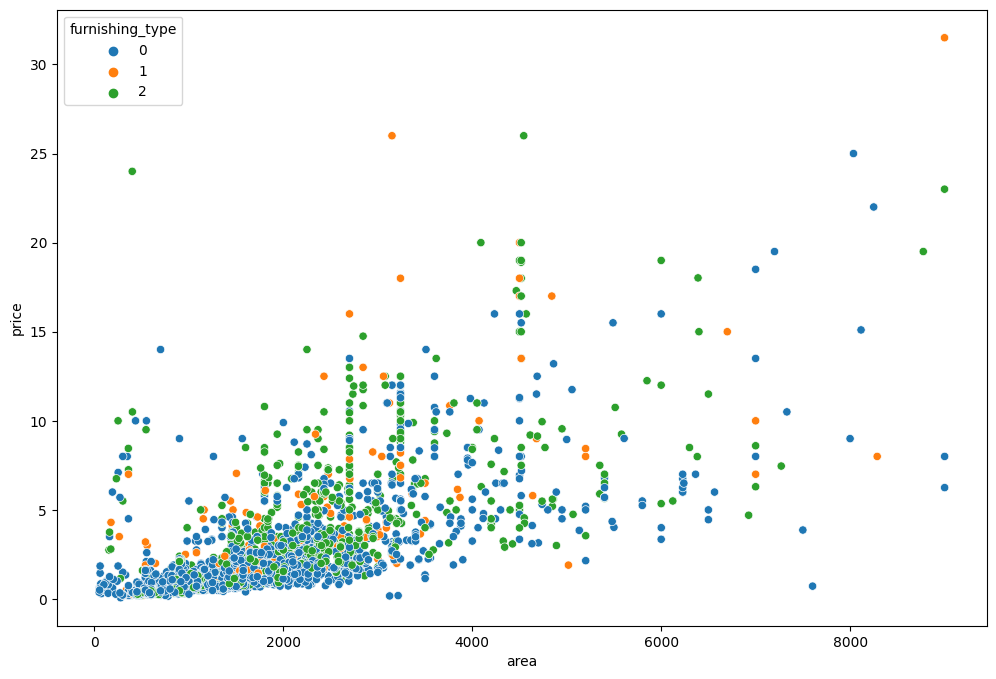

In [123]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x=df[df['area']<10000]['area'],y=df['price'],hue=df['furnishing_type'].astype('category'))

# bedroom vs price
- increase in price with increase in number of bedrooms
-

<Axes: xlabel='bedRoom', ylabel='price'>

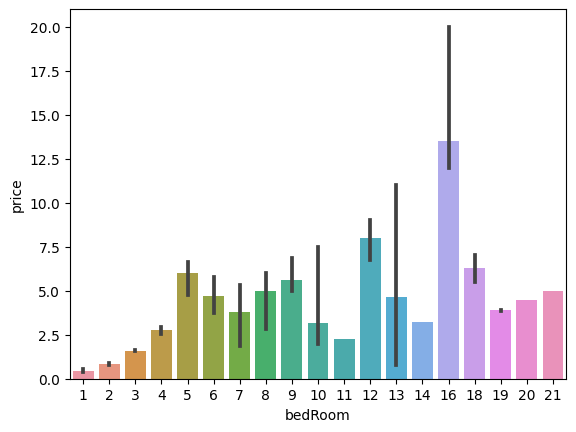

In [124]:
sns.barplot(data=df,x=df['bedRoom'],y=df['price'].dropna(),estimator=np.median)

# age possesion vs price
- older properties surprisingly were costlier

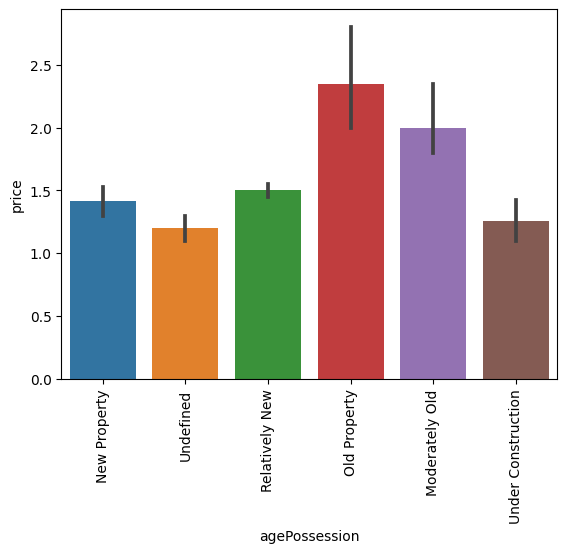

In [125]:
sns.barplot(data=df,x=df['agePossession'],y=df['price'].dropna(),estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

# Area vs agepossesion
- Older properties were again with higher areas

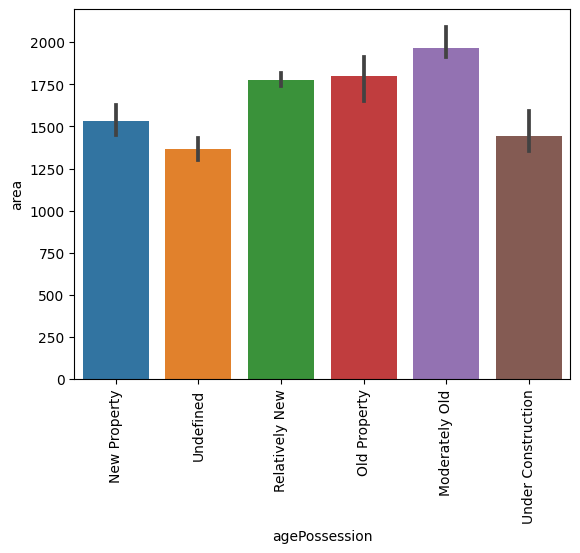

In [126]:
sns.barplot(data=df,x=df['agePossession'],y=df['area'].dropna(),estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

# price vs furnishing type


<Axes: xlabel='furnishing_type', ylabel='price'>

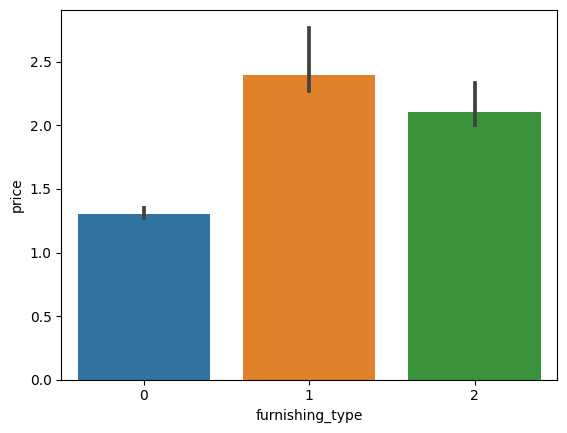

In [127]:
sns.barplot(data=df,x=df['furnishing_type'],y=df['price'].dropna(),estimator=np.median)

# luxury score vs price

<Axes: xlabel='luxury_score', ylabel='price'>

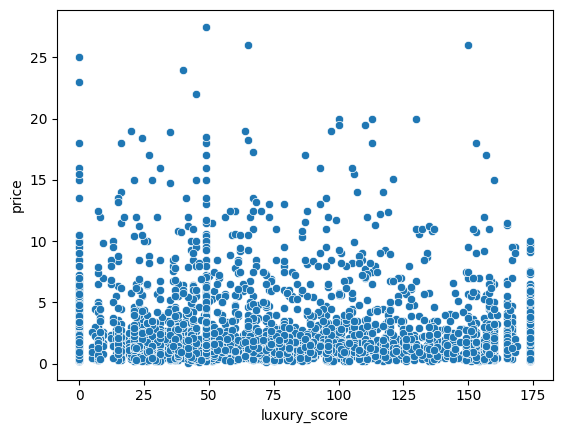

In [128]:
sns.scatterplot(data=df,x=df['luxury_score'],y=df['price'])

### correlation

<ipython-input-129-b1b1aea64704>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

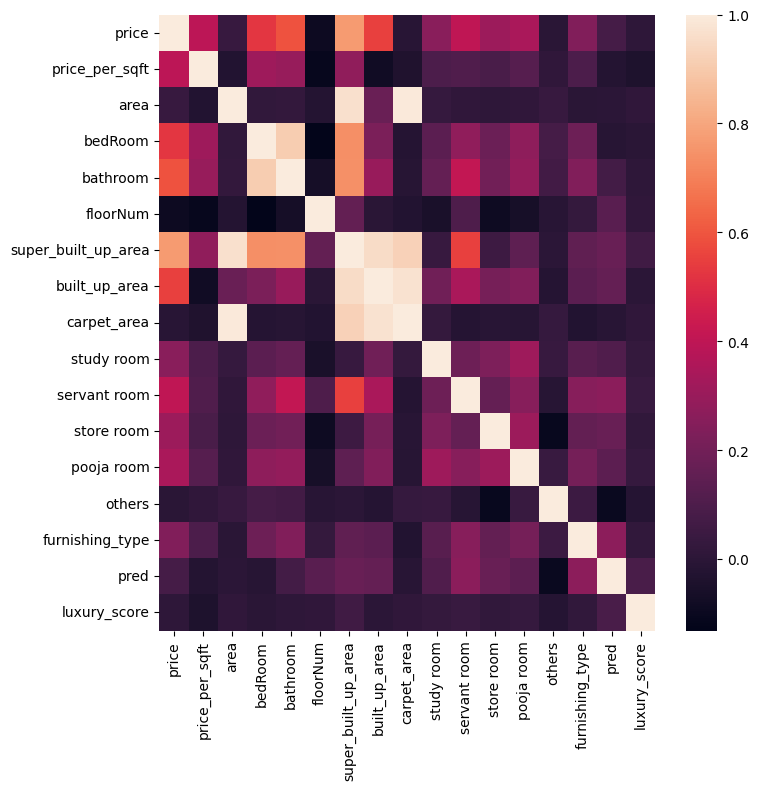

In [129]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [130]:
df.corr()['price'].sort_values(ascending=False)

<ipython-input-130-975b53e39be7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=False)


price                  1.000000
super_built_up_area    0.768421
bathroom               0.589732
built_up_area          0.551711
bedRoom                0.522986
servant room           0.400757
price_per_sqft         0.391242
pooja room             0.341640
store room             0.309234
study room             0.258758
furnishing_type        0.237522
pred                   0.076152
area                   0.034723
luxury_score           0.006423
others                -0.003405
carpet_area           -0.011354
floorNum              -0.094042
Name: price, dtype: float64

In [131]:
df.head()

property_type                   society      sector  price  price_per_sqft  \
0          flat                    godrej   sector 79   1.30          8269.0   
1          flat       trisara our homes 3  sohna road   0.21          4339.0   
2          flat  spaze privvy the address   sector 93   1.45          8033.0   
3          flat    experion the heartsong  sector 108   0.90          7014.0   
4         house         house number b-34    sector 5   0.80          8888.0   

     area                                       areaWithType  bedRoom  \
0  1572.0             Super Built up area 1572(146.04 sq.m.)        2   
1   484.0                   Built Up area: 484 (44.97 sq.m.)        1   
2  1805.0  Super Built up area 1805(167.69 sq.m.)Built Up...        3   
3  1283.0             Super Built up area 1283(119.19 sq.m.)        2   
4   900.0  Plot area 900(83.61 sq.m.)Built Up area: 900 s...        2   

   bathroom balcony  ...  built_up_area carpet_area study room  servant room  \
0         2       3  ...            NaN         NaN          1             0   
1         1       0  ...          484.0         NaN          0             0   
2         4       2  ...         1350.0      1100.0          0             0   
3         3       3  ...            NaN         NaN          0             1   
4         2       1  ...          900.0         NaN          0             0   

   store room  pooja room  others  furnishing_type  pred  luxury_score  
0           0           0       0                0     0          49.0  
1           0           0       0                0     0           0.0  
2           0           0       0                2     0          96.0  
3           0           0       1                0     0          72.0  
4           0           0       0                0     0           0.0  

[5 rows x 24 columns]

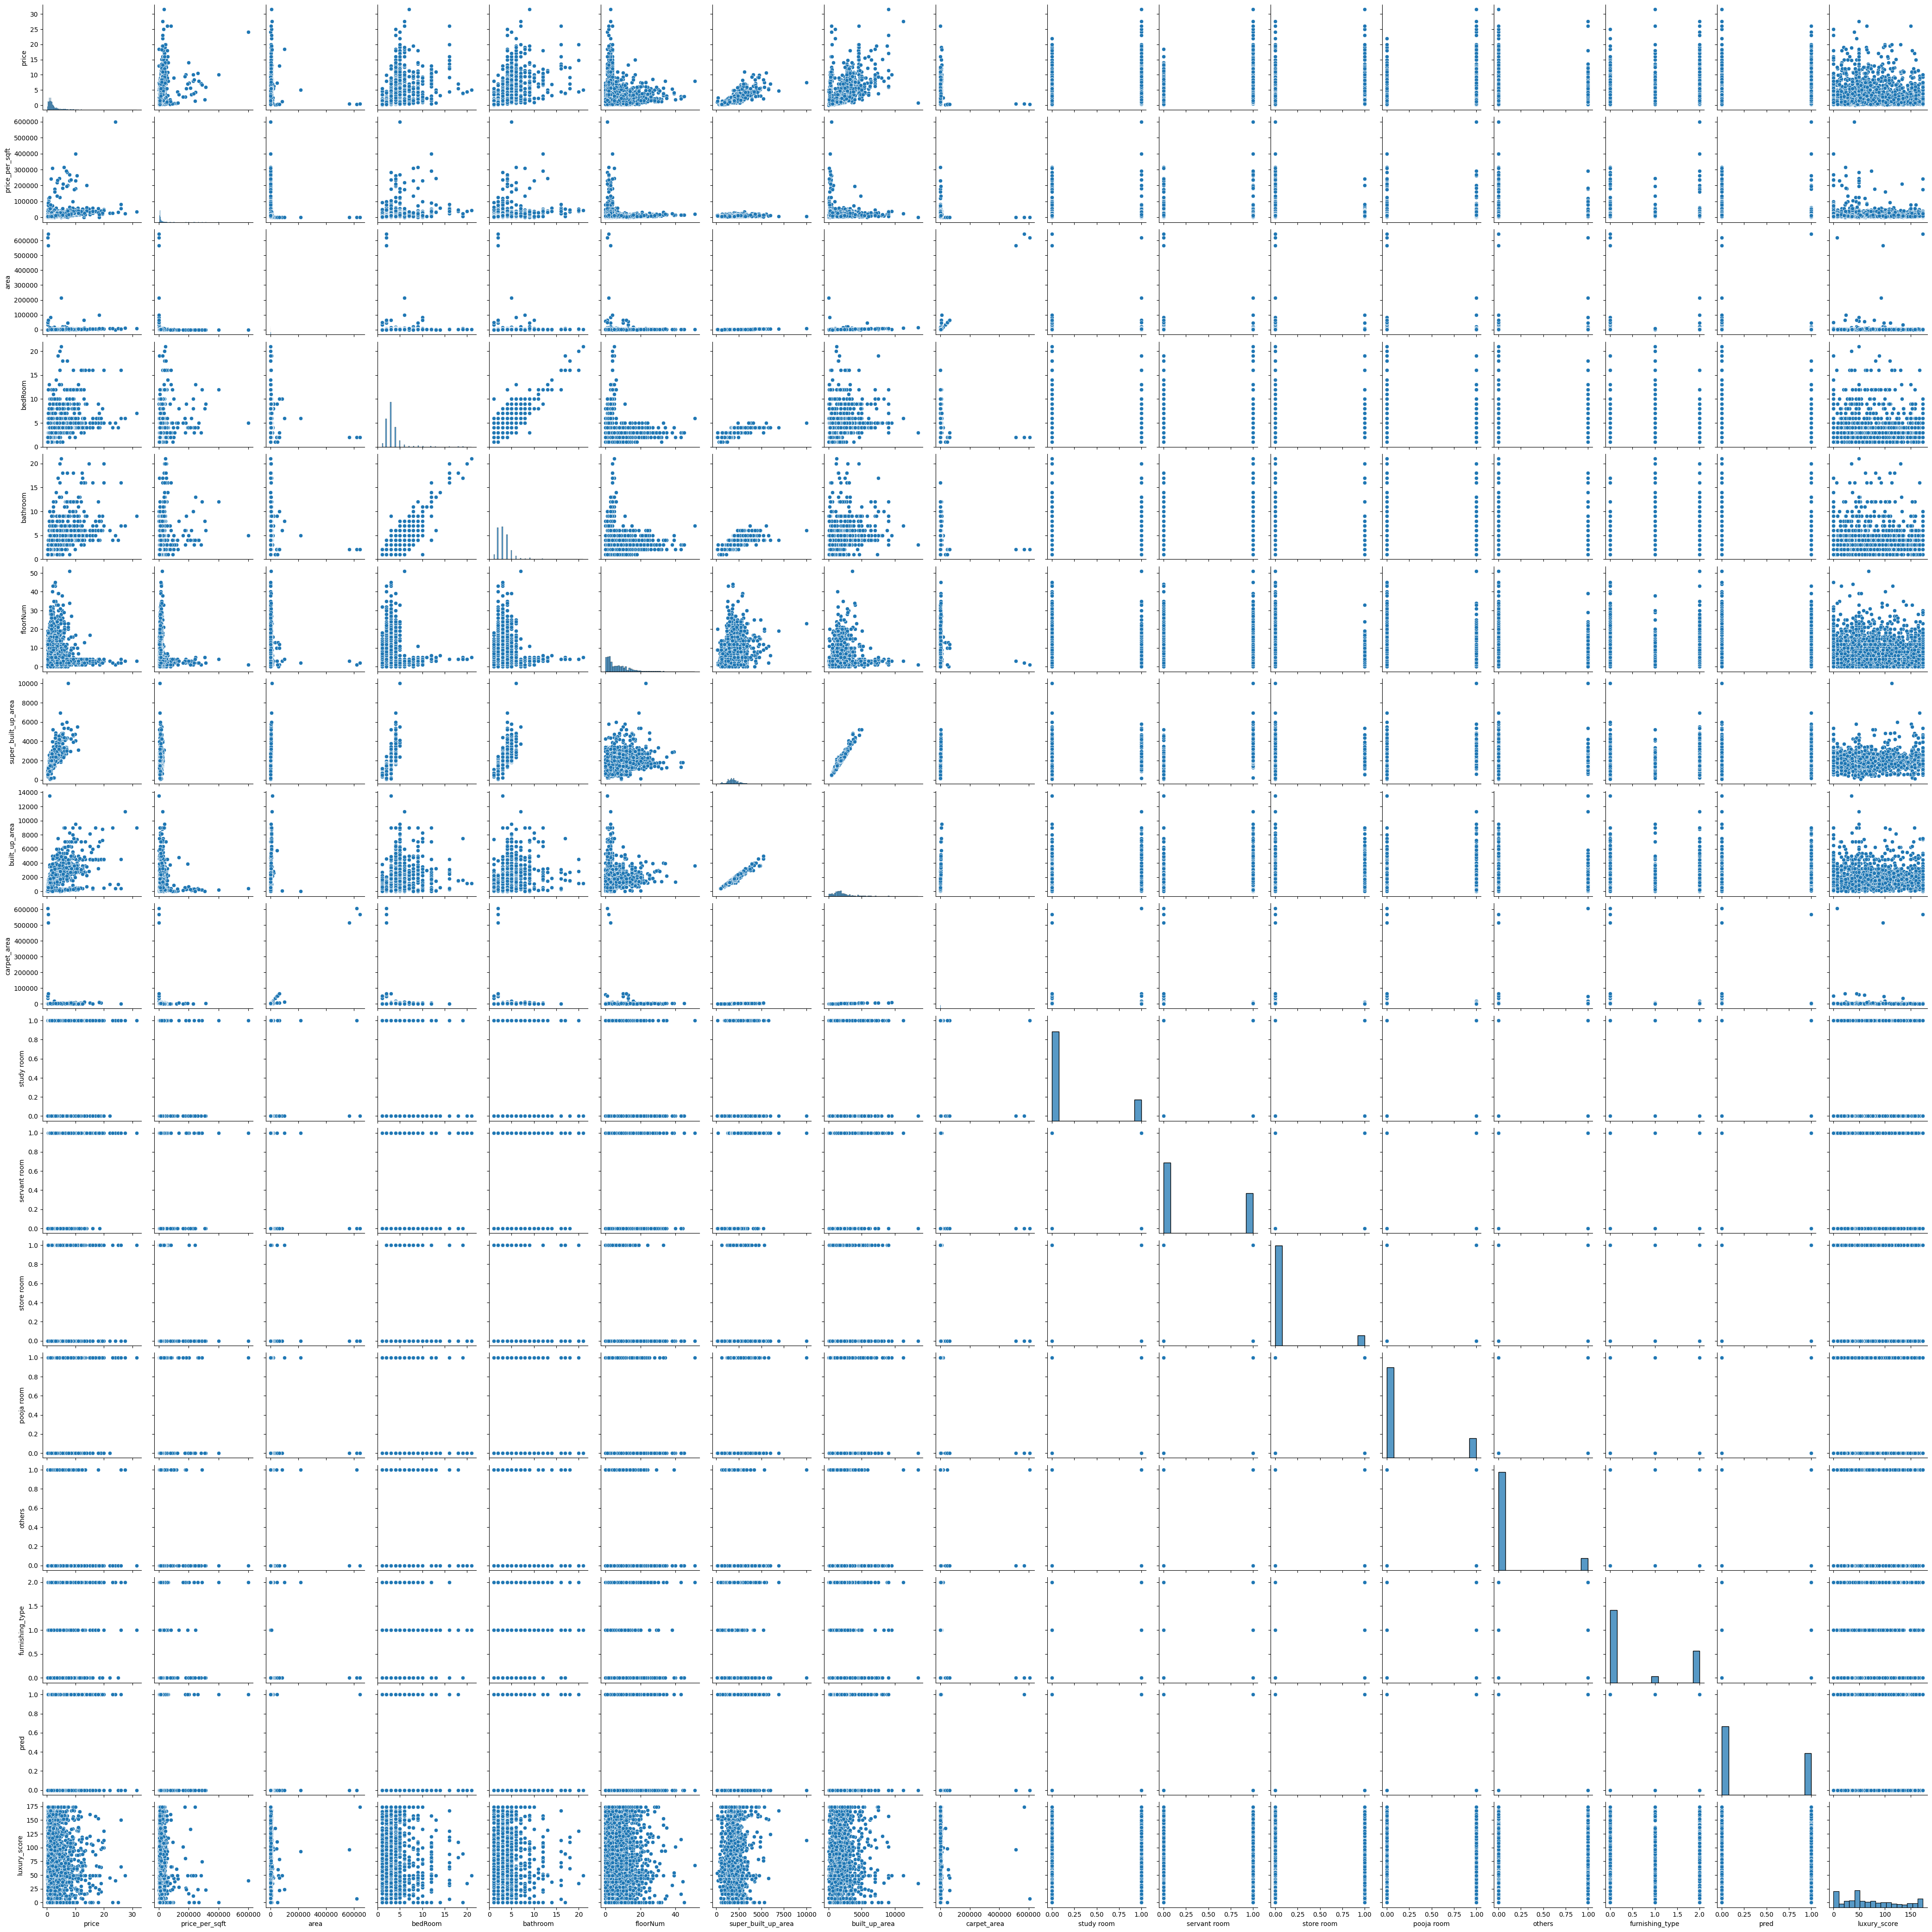

In [ ]:
sns.pairplot(df)